Age effect - Questions

- What are the differences between the ages?
- Which genes and pathways are differentially expressed between 8w and 52w, between 52w and 104w, between 8w and 104w? Are they the same? Is there a gradient?
- Are they different for the two genders?
- Are they different for the two types?

# Loads

## Libraries

In [3]:
options(jupyter.plot_mimetypes = c("text/plain", "image/png" ))

In [5]:
install.packages("pheatmap")
library("pheatmap")

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [6]:
install.packages("gplots")
library(gplots)

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done

Attaching package: ‘gplots’

The following object is masked from ‘package:IRanges’:

    space

The following object is masked from ‘package:S4Vectors’:

    space

The following object is masked from ‘package:stats’:

    lowess



In [7]:
install.packages("UpSetR")
library(UpSetR)
library(ggplot2)
library(grid)
library(plyr)

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done

Attaching package: ‘plyr’

The following object is masked from ‘package:matrixStats’:

    count

The following object is masked from ‘package:IRanges’:

    desc

The following object is masked from ‘package:S4Vectors’:

    rename



In [9]:
biocLite("org.Mm.eg.db")
library(org.Mm.eg.db)

BioC_mirror: https://bioconductor.org
Using Bioconductor 3.6 (BiocInstaller 1.28.0), R 3.4.2 (2017-09-28).
Installing package(s) ‘org.Mm.eg.db’
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Old packages: 'backports', 'BH', 'biomaRt', 'callr', 'caret', 'curl', 'DBI',
  'dbplyr', 'ddalpha', 'digest', 'DRR', 'forcats', 'foreach',
  'GenomeInfoDbData', 'GenomicFeatures', 'GenomicRanges', 'haven', 'hexbin',
  'Hmisc', 'hms', 'htmlTable', 'htmlwidgets', 'httpuv', 'iterators', 'knitr',
  'lava', 'lubridate', 'MASS', 'matrixStats', 'mgcv', 'nlme', 'openssl',
  'pbdZMQ', 'pryr', 'quantmod', 'Rcpp', 'RcppArmadillo', 'RCurl', 'recipes',
  'rentrez', 'reprex', 'reshape2', 'rlang', 'rmarkdown', 'RMySQL', 'rpart',
  'rprojroot', 'rtracklayer', 'stringr', 'SummarizedExperiment', 'tibble',
  'tidyr', 'tidyselect', 'timeDate', 'TTR', 'viridis', 'viridisLite', 'withr',
  'XML', 'xml2', 'xts', 'yaml', 'zoo'
Loading required package: AnnotationDbi



In [10]:
install.packages("rentrez")
library(rentrez)

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [11]:
library("goseq")
biocLite("TxDb.Mmusculus.UCSC.mm10.knownGene")

Loading required package: BiasedUrn
Loading required package: geneLenDataBase

BioC_mirror: https://bioconductor.org
Using Bioconductor 3.6 (BiocInstaller 1.28.0), R 3.4.2 (2017-09-28).
Installing package(s) ‘TxDb.Mmusculus.UCSC.mm10.knownGene’
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Old packages: 'backports', 'BH', 'biomaRt', 'callr', 'caret', 'curl', 'DBI',
  'dbplyr', 'ddalpha', 'digest', 'DRR', 'forcats', 'foreach',
  'GenomeInfoDbData', 'GenomicFeatures', 'GenomicRanges', 'haven', 'hexbin',
  'Hmisc', 'hms', 'htmlTable', 'htmlwidgets', 'httpuv', 'iterators', 'knitr',
  'lava', 'lubridate', 'MASS', 'matrixStats', 'mgcv', 'nlme', 'openssl',
  'pbdZMQ', 'pryr', 'quantmod', 'Rcpp', 'RcppArmadillo', 'RCurl', 'recipes',
  'reprex', 'reshape2', 'rlang', 'rmarkdown', 'RMySQL', 'rpart', 'rprojroot',
  'rtracklayer', 'stringr', 'SummarizedExperiment', 'tibble', 'tidyr',
  'tidyselect', 'timeDate', 'TTR', 'viridis', 'viridisLite', 'withr', 'XML',
  'xml2

## Functions

In [12]:
get_perc = function(v, l){
    s = sum(v, na.rm=T)
    return(round(s*100/l, digits=2))
}
get_sign_padj = function(dge_res) {
    return(get_perc(dge_res$padj < 0.05, sum(!is.na(dge_res$log2FoldChange))))
}
get_pos_sign_padj = function(dge_res) {
    return(get_perc(dge_res$padj < 0.05 & dge_res$log2FoldChange > 0, sum(!is.na(dge_res$log2FoldChange))))
}
get_neg_sign_padj = function(dge_res) {
    return(get_perc(dge_res$padj < 0.05 & dge_res$log2FoldChange < 0, sum(!is.na(dge_res$log2FoldChange))))
}
get_stats_padj  = function(dge_res) {
    v = c(get_sign_padj(dge_res), get_pos_sign_padj(dge_res), get_neg_sign_padj(dge_res))
    names(v) = c("Wald padj < 0.05", "LFC > 0 (Wald padj < 0.05)", "LFC < 0 (Wald padj < 0.05)")
    return(v)
}

In [13]:
clean_mat = function(mat){
    new_mat = mat
    new_mat[is.na(new_mat)] = 0
    new_mat = new_mat[rowSums(new_mat) > 0,]
    return(new_mat)
}
get_interesting_cat = function(wall, data_type, cat_type){
    # extract the categories with a significant p-values (over or under represented pvalue)
    enriched_cat = lapply(wall, function(x) x[p.adjust(x[,data_type],method="BH")<.05,])
    # extract the category names for the significant categories and merge them for all the comparisons
    if(cat_type == "GO"){
        cat = unique(do.call(rbind,lapply(enriched_cat, function(x) x[,c("category","term","ontology")])))
        rownames(cat) = do.call(rbind,strsplit(rownames(cat), split='.', fixed=TRUE))[,2]
    }else{
        cat = unique(do.call(rbind,lapply(enriched_cat, function(x) cbind(rownames(x),x[,c("category")]))))
        names = cat[,1]
        cat = matrix(cat[,-1])
        rownames(cat) = names
    }
    # combine the significant categories for all comparisons
    full_mat = cbind(cat, sapply(enriched_cat, function(x) x[rownames(cat),data_type]))
    return(full_mat)
}
extract_diff_expr_genes = function(in_l, name){
    l = list()
    # extract the significant differentially expressed genes (all, upregulated, downregulated)
    l$deg = sapply(in_l, function(mat) return(mat$padj < 0.05))*1
    rownames(l$deg) = rownames(in_l[[1]])
    l$deg = clean_mat(l$deg)
    deg_names = rownames(l$deg)
    head(l$deg)
    # extract the significant differentially more expressed genes
    l$pos = sapply(in_l, function(mat) return(mat[deg_names, 'log2FoldChange'] > 0))*1
    l$pos[l$deg == 0] = 0
    rownames(l$pos) = deg_names
    l$pos = clean_mat(l$pos)
    # extract the significant differentially less expressed genes
    l$neg = sapply(in_l, function(mat) return(mat[deg_names, 'log2FoldChange'] < 0))*1
    l$neg[l$deg == 0] = 0
    rownames(l$neg) = deg_names
    l$neg = clean_mat(l$neg)
    # extract the log2FC of the significant differentially expressed genes
    l$fc_deg = sapply(in_l, function(mat) return(mat[deg_names, 'log2FoldChange']))
    rownames(l$fc_deg) = deg_names
    l$fc_deg[l$deg == 0] = NA
    write.table(l$fc_deg, name, sep = "\t", quote = FALSE)
    #system(paste("put -p", name, "-t tabular"), intern=T)
    ## GO and KEGG analysis                  
    assayed_genes = rownames(in_l[[1]])
    assayed_genes
    # extract the DE genes (1 in the deg matrix)
    de_genes = sapply(colnames(l$deg), function(x) names(which(l$deg[,x]==1)))
    # extract in the full list of genes the DE ones                  
    gene_vector = sapply(de_genes, function(x) as.integer(assayed_genes%in%x))
    rownames(gene_vector) = assayed_genes
    # fit the probability weighting function
    pwf = lapply(1:dim(gene_vector)[2], function(x) nullp(gene_vector[,x], 'mm10', 'geneSymbol', plot.fit=F))
    names(pwf) = colnames(gene_vector)
    # calculate the over and under expressed GO categories among the DE genes
    GO_wall = lapply(pwf, function(x) goseq(x,'mm10', 'geneSymbol'))
    # calculate the over and under expressed KEGG pathways among the DE genes
    KEGG_wall = lapply(pwf, function(x) goseq(x,'mm10', 'geneSymbol', test.cats="KEGG"))
    # extract interesting pathways/categories and export them
    l$over_represented_GO = get_interesting_cat(GO_wall, "over_represented_pvalue", "GO")
    write.table(l$over_represented_GO, paste(name, "over_represented_GO"), sep = "\t", quote = FALSE)                
    l$under_represented_GO = get_interesting_cat(GO_wall, "under_represented_pvalue", "GO")
    write.table(l$under_represented_GO, paste(name, "under_represented_GO"), sep = "\t", quote = FALSE)
    l$over_represented_KEGG = get_interesting_cat(KEGG_wall, "over_represented_pvalue", "KEGG")
    write.table(l$over_represented_KEGG, paste(name, "over_represented_KEGG"), sep = "\t", quote = FALSE)    
    l$under_represented_KEGG = get_interesting_cat(KEGG_wall, "under_represented_pvalue", "KEGG")
    write.table(l$under_represented_KEGG, paste(name, "under_represented_KEGG"), sep = "\t", quote = FALSE)                       
    return(l)
}                       

In [14]:
get_number = function(bool_expr) return(sum(bool_expr*1))
get_repartition = function(dge_mat) return(cbind(get_number(dge_mat[,1]>0 & dge_mat[,2]>0), get_number(dge_mat[,1]>0 & dge_mat[,2]<0), get_number(dge_mat[,1]<0 & dge_mat[,2]>0), get_number(dge_mat[,1]<0 & dge_mat[,2]<0)))
get_repartition_3col = function(dge_mat) return(cbind(
    get_number(dge_mat[,1]>0 & dge_mat[,2]>0 & dge_mat[,3]>0),
    get_number(dge_mat[,1]>0 & dge_mat[,2]>0 & dge_mat[,3]<0), 
    get_number(dge_mat[,1]>0 & dge_mat[,2]<0 & dge_mat[,3]>0), 
    get_number(dge_mat[,1]>0 & dge_mat[,2]<0 & dge_mat[,3]<0), 
    get_number(dge_mat[,1]<0 & dge_mat[,2]>0 & dge_mat[,3]>0), 
    get_number(dge_mat[,1]<0 & dge_mat[,2]>0 & dge_mat[,3]<0), 
    get_number(dge_mat[,1]<0 & dge_mat[,2]<0 & dge_mat[,3]>0), 
    get_number(dge_mat[,1]<0 & dge_mat[,2]<0 & dge_mat[,3]<0)))

In [15]:
quantile_breaks = function(xs, n = 10) {
    breaks = quantile(xs, probs = seq(0, 1, length.out = n))
    breaks[!duplicated(breaks)]
}
plot_count_heatmap = function(genes, samples, annot){
    data = norm_counts[genes,samples]
    breaks = quantile_breaks(data, n = 11)
    pheatmap(data, cluster_rows=F, cluster_cols=F, show_rownames=F, show_colnames=F, annotation_col=annot, breaks=breaks, color=inferno(10))  
}

In [16]:
get_list = function(mapping){
    mapped_genes = mappedkeys(mapping)
    return(as.list(mapping[mapped_genes]))
}
# Map between Entrez Gene Identifiers and Gene Names (and description) 
eg2name = get_list(org.Mm.egGENENAME)
# Map between Gene Symbols and Entrez Gene Identifiers
symbol2eg = get_list(org.Mm.egSYMBOL2EG)
# Map between RefSeq and Entrez Gene Identifiers
refseq2eg = get_list(org.Mm.egREFSEQ2EG)
# Map between Gene Symbols and Gene Names (and description)
symbol2name = sapply(names(symbol2eg), function(x) return(eg2name[symbol2eg[[x]]]))
head(symbol2name)
# Map between Entrez Gene Identifiers and KEGG pathways
eg2kegg=as.list(org.Mm.egPATH)

$Pzp
$Pzp$`11287`
[1] "PZP, alpha-2-macroglobulin like"


$Aanat
$Aanat$`11298`
[1] "arylalkylamine N-acetyltransferase"


$Aatk
$Aatk$`11302`
[1] "apoptosis-associated tyrosine kinase"


$Abca1
$Abca1$`11303`
[1] "ATP-binding cassette, sub-family A (ABC1), member 1"


$Abca4
$Abca4$`11304`
[1] "ATP-binding cassette, sub-family A (ABC1), member 4"


$Abca2
$Abca2$`11305`
[1] "ATP-binding cassette, sub-family A (ABC1), member 2"

In [17]:
# search on Entrez the correct name
search_name = function(name){
    search = entrez_search(db="gene",term=name)
    names = c()
    for(id in search$ids){
        sum = entrez_summary(db="gene", id=id)
        if(sum$organism$scientificname == 'Mus musculus' & grepl(name,sum$otheraliases)){
            names = c(names, sum$name)
        }
    }
    return(names)
}

In [18]:
capFirst = function(s) {
    paste(substring(s, 1, 1), tolower(substring(s, 2)), sep = "")
}

## Data

# Global stats

In [28]:
# Comparison between the ages (after controlling for type and gender)
global_52w_8w = results(dge, contrast= c(0,0,0,0,1,0,1/2,0,0,1/2), alpha=0.05, test="Wald")
global_104w_8w = results(dge, contrast= c(0,0,0,1,0,1/2,0,0,1/2,0), alpha=0.05, test="Wald")
global_104w_52w = results(dge, contrast= c(0,0,0,1,-1,1/2,-1/2,0,1/2,-1/2), alpha=0.05, test="Wald")
# Stats
global_stats = matrix(0, nrow=3, ncol=3)
rownames(global_stats) = c("52w VS 8w", "104w VS 8w", "104w VS 52w")
colnames(global_stats) = c("Wald padj < 0.05", "LFC > 0 (Wald padj < 0.05)", "LFC < 0 (Wald padj < 0.05)")
global_stats[1,] = get_stats_padj(global_52w_8w)
global_stats[2,] = get_stats_padj(global_104w_8w)
global_stats[3,] = get_stats_padj(global_104w_52w)
global_stats

Wald padj < 0.05 LFC > 0 (Wald padj < 0.05)
52w VS 8w   10.41            5.68                      
104w VS 8w  15.41            8.21                      
104w VS 52w 11.02            6.04                      
            LFC < 0 (Wald padj < 0.05)
52w VS 8w   4.74                      
104w VS 8w  7.20                      
104w VS 52w 4.98

In [29]:
# Interactions between ages and types (after controlling gender)
SPF_52w_8w = results(dge,contrast= c(0,0,0,0,1,0,1/2,0,0,0), alpha=0.05, test="Wald")
GF_52w_8w = results(dge,contrast= c(0,0,0,0,1,0,1/2,0,0,1), alpha=0.05, test="Wald")
SPF_104w_8w = results(dge,contrast= c(0,0,0,1,0,1/2,0,0,0,0), alpha=0.05, test="Wald")
GF_104w_8w = results(dge,contrast= c(0,0,0,1,0,1/2,0,0,1,0), alpha=0.05, test="Wald")
SPF_104w_52w = results(dge,contrast= c(0,0,0,1,-1,1/2,-1/2,0,0,0), alpha=0.05, test="Wald")
GF_104w_52w = results(dge,contrast= c(0,0,0,1,-1,1/2,-1/2,0,1,-1), alpha=0.05, test="Wald")
# Stats
age_type_stats = matrix(0, nrow=6, ncol=3)
rownames(age_type_stats) = c("52w VS 8w (SPF)","52w VS 8w (GF)", "104w VS 8w (SPF)", "104w VS 8w (GF)", "104w VS 52w (SPF)", "104w VS 52w (GF)")
colnames(age_type_stats) = c("Wald padj < 0.05", "LFC > 0 (Wald padj < 0.05)", "LFC < 0 (Wald padj < 0.05)")
age_type_stats[1,] = get_stats_padj(SPF_52w_8w)
age_type_stats[2,] = get_stats_padj(GF_52w_8w)
age_type_stats[3,] = get_stats_padj(SPF_104w_8w)
age_type_stats[4,] = get_stats_padj(GF_104w_8w)
age_type_stats[5,] = get_stats_padj(SPF_104w_52w)
age_type_stats[6,] = get_stats_padj(GF_104w_52w)
age_type_stats

Wald padj < 0.05 LFC > 0 (Wald padj < 0.05)
52w VS 8w (SPF)    6.71            3.84                      
52w VS 8w (GF)     2.90            1.77                      
104w VS 8w (SPF)  15.60            8.56                      
104w VS 8w (GF)    8.98            4.69                      
104w VS 52w (SPF)  7.11            4.27                      
104w VS 52w (GF)   7.83            4.08                      
                  LFC < 0 (Wald padj < 0.05)
52w VS 8w (SPF)   2.87                      
52w VS 8w (GF)    1.12                      
104w VS 8w (SPF)  7.03                      
104w VS 8w (GF)   4.29                      
104w VS 52w (SPF) 2.84                      
104w VS 52w (GF)  3.75

In [30]:
# Interactions between ages and genders (after controlling type)
F_52w_8w = results(dge,contrast= c(0,0,0,0,1,0,0,0,0,1/2), alpha=0.05, test="Wald")
M_52w_8w = results(dge,contrast= c(0,0,0,0,1,0,1,0,0,1/2), alpha=0.05, test="Wald")
F_104w_8w = results(dge,contrast= c(0,0,0,1,0,0,0,0,1/2,0), alpha=0.05, test="Wald")
M_104w_8w = results(dge,contrast= c(0,0,0,1,0,1,0,0,1/2,0), alpha=0.05, test="Wald")
F_104w_52w = results(dge,contrast= c(0,0,0,1,-1,0,0,0,1/2,-1/2), alpha=0.05, test="Wald")
M_104w_52w = results(dge,contrast= c(0,0,0,1,-1,1,-1,0,1/2,-1/2), alpha=0.05, test="Wald")
# Stats
age_gender_stats = matrix(0, nrow=6, ncol=3)
rownames(age_gender_stats) = c("52w VS 8w (F)","52w VS 8w (M)", "104w VS 8w (F)", "104w VS 8w (M)", "104w VS 52w (F)", "104w VS 52w (M)")
colnames(age_gender_stats) = c("Wald padj < 0.05", "LFC > 0 (Wald padj < 0.05)", "LFC < 0 (Wald padj < 0.05)")
age_gender_stats[1,] = get_stats_padj(F_52w_8w)
age_gender_stats[2,] = get_stats_padj(M_52w_8w)
age_gender_stats[3,] = get_stats_padj(F_104w_8w)
age_gender_stats[4,] = get_stats_padj(M_104w_8w)
age_gender_stats[5,] = get_stats_padj(F_104w_52w)
age_gender_stats[6,] = get_stats_padj(M_104w_52w)
age_gender_stats

Wald padj < 0.05 LFC > 0 (Wald padj < 0.05)
52w VS 8w (F)   11.00            6.11                      
52w VS 8w (M)    2.06            1.26                      
104w VS 8w (F)   8.89            5.18                      
104w VS 8w (M)  17.89            9.29                      
104w VS 52w (F)  1.40            0.82                      
104w VS 52w (M) 18.69            9.53                      
                LFC < 0 (Wald padj < 0.05)
52w VS 8w (F)   4.89                      
52w VS 8w (M)   0.80                      
104w VS 8w (F)  3.70                      
104w VS 8w (M)  8.60                      
104w VS 52w (F) 0.58                      
104w VS 52w (M) 9.16

In [31]:
# Interactions between ages, types and genders
F_SPF_52w_8w = results(dge,contrast= c(0,0,0,0,1,0,0,0,0,0), alpha=0.05, test="Wald")
F_GF_52w_8w = results(dge,contrast= c(0,0,0,0,1,0,0,0,0,1), alpha=0.05, test="Wald")
M_SPF_52w_8w = results(dge,contrast= c(0,0,0,0,1,0,1,0,0,0), alpha=0.05, test="Wald")
M_GF_52w_8w = results(dge,contrast= c(0,0,0,0,1,0,1,0,0,1), alpha=0.05, test="Wald")
F_SPF_104w_8w = results(dge,contrast= c(0,0,0,1,0,0,0,0,0,0), alpha=0.05, test="Wald")
F_GF_104w_8w = results(dge,contrast= c(0,0,0,1,0,0,0,0,1,0), alpha=0.05, test="Wald")
M_SPF_104w_8w = results(dge,contrast= c(0,0,0,1,0,1,0,0,0,0), alpha=0.05, test="Wald")
M_GF_104w_8w = results(dge,contrast= c(0,0,0,1,0,1,0,0,1,0), alpha=0.05, test="Wald")
F_SPF_104w_52w = results(dge,contrast= c(0,0,0,1,-1,0,0,0,0,0), alpha=0.05, test="Wald")
F_GF_104w_52w = results(dge,contrast= c(0,0,0,1,-1,0,0,0,1,-1), alpha=0.05, test="Wald")
M_SPF_104w_52w = results(dge,contrast= c(0,0,0,1,-1,1,-1,0,0,0), alpha=0.05, test="Wald")
M_GF_104w_52w = results(dge,contrast= c(0,0,0,1,-1,1,-1,0,1,-1), alpha=0.05, test="Wald")
# Stats
age_gender_type_stats = matrix(0, nrow=12, ncol=3)
rownames(age_gender_type_stats) = c("52w VS 8w (F, SPF)","52w VS 8w (F, GF)", "52w VS 8w (M, SPF)", "52w VS 8w (M, GF)", "104w VS 8w (F, SPF)", "104w VS 8w (F, GF)", "104w VS 8w (M, SPF)", "104w VS 8w (M, GF)", "104w VS 52w (F, SPF)", "104w VS 52w (F, GF)", "104w VS 52w (M, SPF)", "104w VS 52w (M, GF)")
colnames(age_gender_type_stats) = c("Wald padj < 0.05", "LFC > 0 (Wald padj < 0.05)", "LFC < 0 (Wald padj < 0.05)")
age_gender_type_stats[1,] = get_stats_padj(F_SPF_52w_8w)
age_gender_type_stats[2,] = get_stats_padj(F_GF_52w_8w)
age_gender_type_stats[3,] = get_stats_padj(M_SPF_52w_8w)
age_gender_type_stats[4,] = get_stats_padj(M_GF_52w_8w)
age_gender_type_stats[5,] = get_stats_padj(F_SPF_104w_8w)
age_gender_type_stats[6,] = get_stats_padj(F_GF_104w_8w)
age_gender_type_stats[7,] = get_stats_padj(M_SPF_104w_8w)
age_gender_type_stats[8,] = get_stats_padj(M_GF_104w_8w)
age_gender_type_stats[9,] = get_stats_padj(F_SPF_104w_52w)
age_gender_type_stats[10,] = get_stats_padj(F_GF_104w_52w)
age_gender_type_stats[11,] = get_stats_padj(M_SPF_104w_52w)
age_gender_type_stats[12,] = get_stats_padj(M_GF_104w_52w)
age_gender_type_stats

Wald padj < 0.05 LFC > 0 (Wald padj < 0.05)
52w VS 8w (F, SPF)    8.68            5.01                      
52w VS 8w (F, GF)     4.95            3.07                      
52w VS 8w (M, SPF)    1.77            1.19                      
52w VS 8w (M, GF)     1.11            0.61                      
104w VS 8w (F, SPF)   9.67            5.35                      
104w VS 8w (F, GF)    6.89            3.73                      
104w VS 8w (M, SPF)  18.65            9.99                      
104w VS 8w (M, GF)   11.30            5.77                      
104w VS 52w (F, SPF)  1.04            0.56                      
104w VS 52w (F, GF)   2.17            1.12                      
104w VS 52w (M, SPF) 16.55            8.91                      
104w VS 52w (M, GF)  13.26            6.66                      
                     LFC < 0 (Wald padj < 0.05)
52w VS 8w (F, SPF)   3.67                      
52w VS 8w (F, GF)    1.89                      
52w VS 8w (M, SPF)   0.58                      
52w VS 8w (M, GF)    0.50                      
104w VS 8w (F, SPF)  4.32                      
104w VS 8w (F, GF)   3.17                      
104w VS 8w (M, SPF)  8.66                      
104w VS 8w (M, GF)   5.53                      
104w VS 52w (F, SPF) 0.48                      
104w VS 52w (F, GF)  1.05                      
104w VS 52w (M, SPF) 7.64                      
104w VS 52w (M, GF)  6.60

# Comparison between the ages (after controlling for type and gender)
Questions

- What are the differences between the ages?
- Which genes and pathways are differentially expressed between 8w and 52w, between 52w and 104w, between 8w and 104w? Are they the same? Is there a gradient?

In [34]:
age_data = list(global_52w_8w, global_104w_8w, global_104w_52w)
names(age_data) = c("52w VS 8w", "104w VS 8w", "104w VS 52w")
age_deg = extract_diff_expr_genes(age_data, "age_data")

Can't find mm10/geneSymbol length data in genLenDataBase...
Warning message in grep(txdbPattern, installedPackages):
“argument 'pattern' has length > 1 and only the first element will be used”Found the annotaion package, TxDb.Mmusculus.UCSC.mm10.knownGene
Trying to get the gene lengths from it.
Loading required package: GenomicFeatures
Warning message in pcls(G):
“initial point very close to some inequality constraints”Can't find mm10/geneSymbol length data in genLenDataBase...
Warning message in grep(txdbPattern, installedPackages):
“argument 'pattern' has length > 1 and only the first element will be used”Found the annotaion package, TxDb.Mmusculus.UCSC.mm10.knownGene
Trying to get the gene lengths from it.
Warning message in pcls(G):
“initial point very close to some inequality constraints”Can't find mm10/geneSymbol length data in genLenDataBase...
Warning message in grep(txdbPattern, installedPackages):
“argument 'pattern' has length > 1 and only the first element will be used”Foun

In [35]:
samples = c(
    'SPF_8w_F_1_2','SPF_8w_F_3_2','SPF_8w_F_4_2','SPF_8w_F_5_2','GF_8w_F_1_2','GF_8w_F_2_2','GF_8w_F_3_2','GF_8w_F_4_2','GF_8w_F_5_2','SPF_8w_M_1_2','SPF_8w_M_2_2','SPF_8w_M_3_2','SPF_8w_M_4_2','GF_8w_M_1_2','GF_8w_M_2_2','GF_8w_M_3_2','GF_8w_M_4_2',
    'SPF_52w_F_1_2','SPF_52w_F_2_2','SPF_52w_F_3_2','SPF_52w_F_4_2','SPF_52w_F_5_2','SPF_52w_F_6_2','GF_52w_F_1_2','GF_52w_F_2_2','GF_52w_F_3_2','GF_52w_F_4_2','GF_52w_F_5_2','GF_52w_F_6_2','SPF_52w_M_1_2','SPF_52w_M_2_2','SPF_52w_M_3_2','SPF_52w_M_4_2','SPF_52w_M_5_2','GF_52w_M_1_2','GF_52w_M_2_2','GF_52w_M_3_2','GF_52w_M_4_2',
    'SPF_104w_F_1_2','SPF_104w_F_2_2','SPF_104w_F_3_2','GF_104w_F_1_2','GF_104w_F_2_2','GF_104w_F_3_2','SPF_104w_M_1_2','SPF_104w_M_2_2','SPF_104w_M_3_2','SPF_104w_M_4_2','SPF_104w_M_5_2','SPF_104w_M_6_2','SPF_104w_M_7_2','SPF_104w_M_8_2','SPF_104w_M_9_2','SPF_104w_M_10_2','SPF_104w_M_11_2','SPF_104w_M_12_2','SPF_104w_M_13_2','SPF_104w_M_14_2','GF_104w_M_1_2','GF_104w_M_2_2')
annot = as.data.frame(colData(dge)[, c("age", "gender", "type")])

In [36]:
get_interesting_cat = function(wall, data_type, cat_type){
    # extract the categories with a significant p-values (over or under represented pvalue)
    enriched_cat = lapply(wall, function(x) x[p.adjust(x[,data_type],method="BH")<.05,])
    # extract the category names for the significant categories and merge them for all the comparisons
    if(cat_type == "GO"){
        cat = unique(do.call(rbind,lapply(enriched_cat, function(x) x[,c("category","term","ontology")])))
        rownames(cat) = do.call(rbind,strsplit(rownames(cat), split='.', fixed=TRUE))[,2]
    }else{
        cat = unique(do.call(rbind,lapply(enriched_cat, function(x) cbind(rownames(x),x[,c("category")]))))
        names = cat[,1]
        cat = matrix(cat[,-1])
        rownames(cat) = names
    }
    # combine the significant categories for all comparisons
    full_mat = cbind(cat, sapply(enriched_cat, function(x) x[rownames(cat),data_type]))
    return(full_mat)
}
enriched_cat = lapply(KEGG_wall, function(x) x[p.adjust(x[,"over_represented_pvalue"],method="BH")<.05,])
cat = unique(unlist(lapply(enriched_cat, function(x) x[,c("category")])))
head(get_interesting_cat(KEGG_wall, "over_represented_pvalue", "KEGG"))
head(get_interesting_cat(KEGG_wall, "under_represented_pvalue", "KEGG"))

ERROR: Error in lapply(KEGG_wall, function(x) x[p.adjust(x[, "over_represented_pvalue"], : object 'KEGG_wall' not found


## Counts

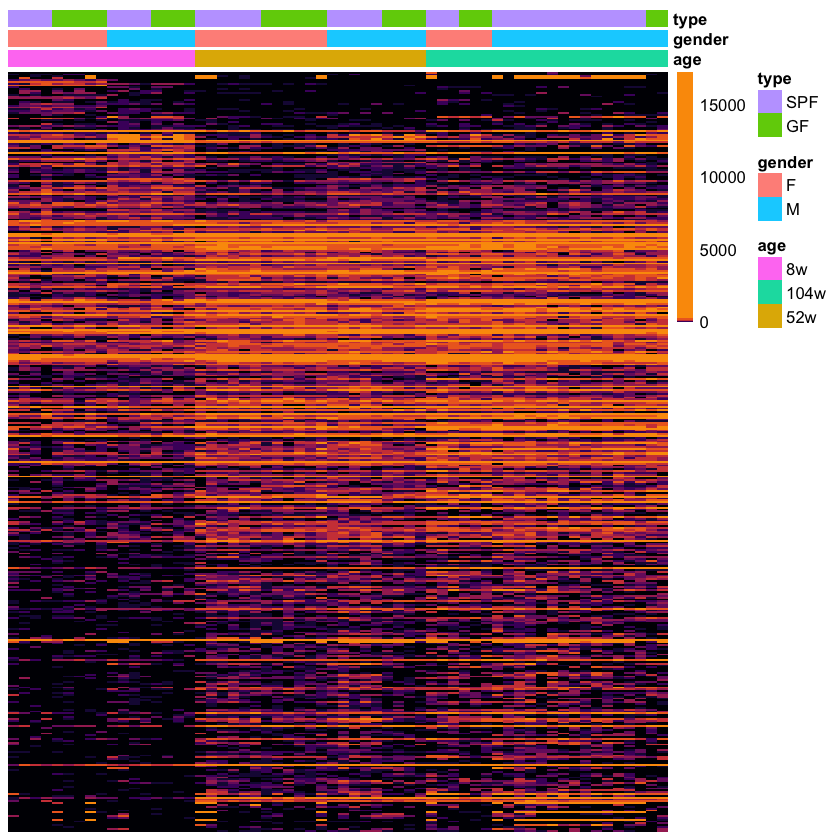

In [37]:
# 52w != 8w with abs(FC) > 2
genes = names((sort(age_deg$fc_deg[which(abs(age_deg$fc_deg[,1])>1),1])))
plot_count_heatmap(genes,samples, annot)

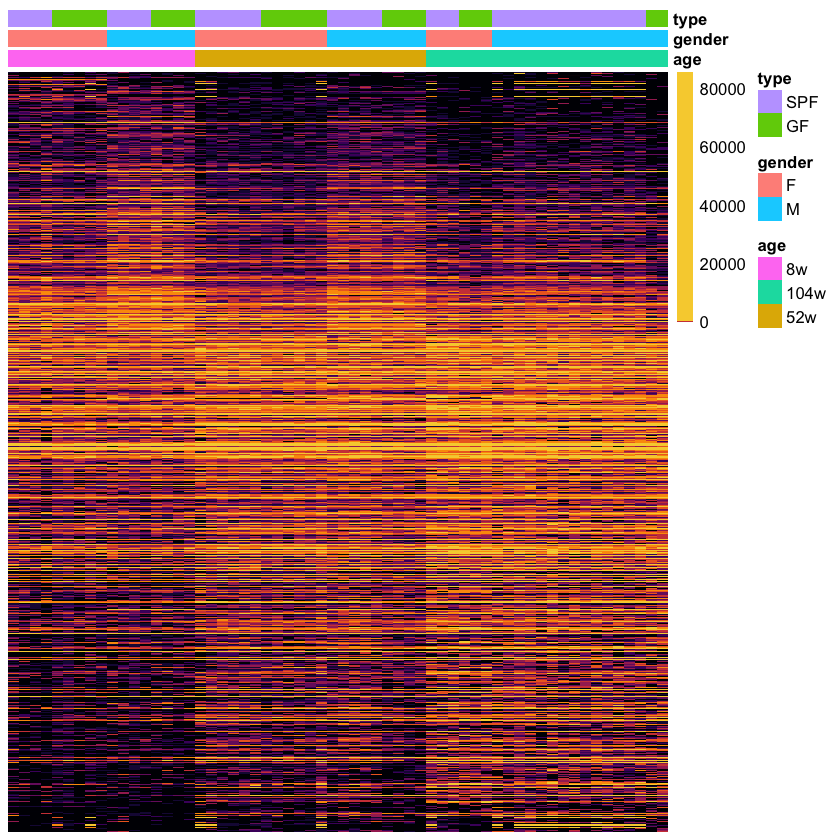

In [38]:
# 104w != 8w with abs(FC) > 2
genes = names((sort(age_deg$fc_deg[which(abs(age_deg$fc_deg[,2])>1),2])))
plot_count_heatmap(genes,samples, annot)

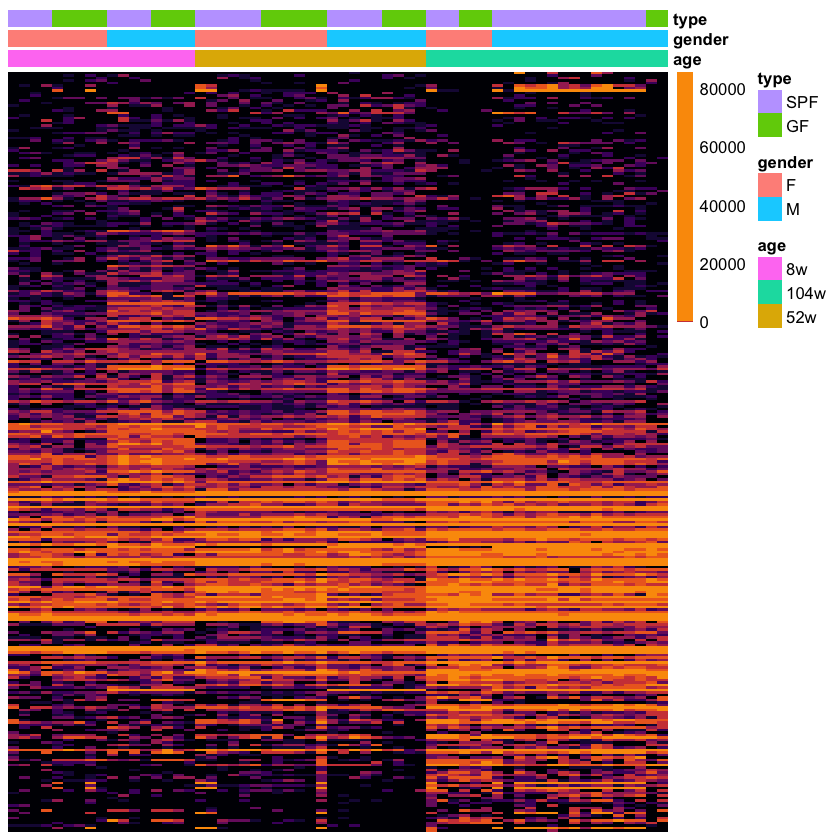

In [39]:
# 104w != 52w with abs(FC) > 2
genes = names((sort(age_deg$fc_deg[which(abs(age_deg$fc_deg[,3])>1),3])))
plot_count_heatmap(genes,samples, annot)

## Compare the numbers

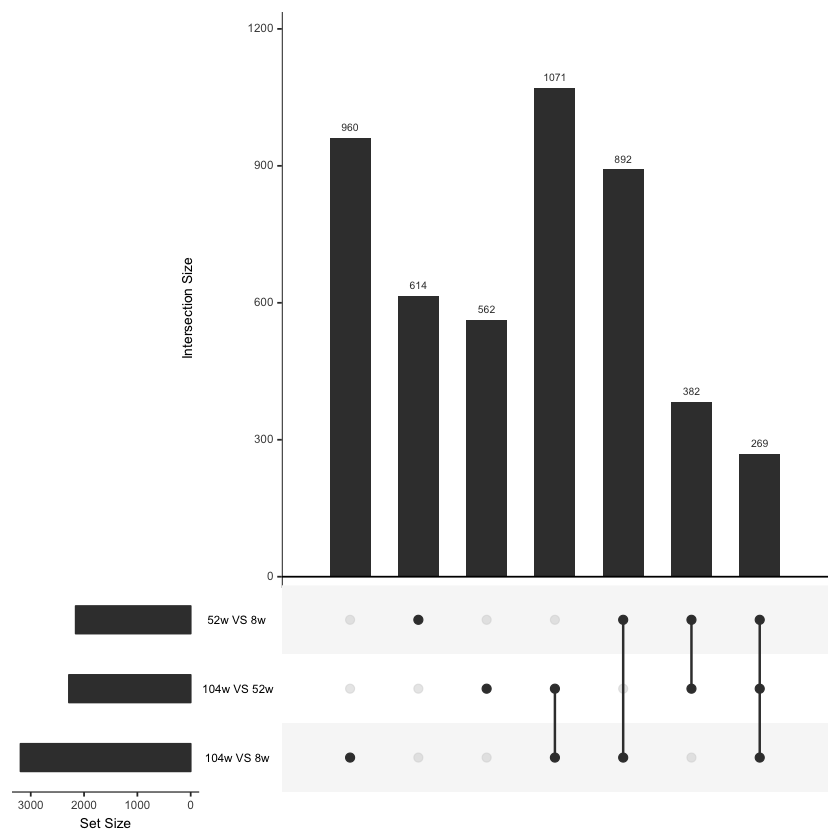

In [40]:
# Differentially expressed genes
upset(as.data.frame(age_deg$deg))

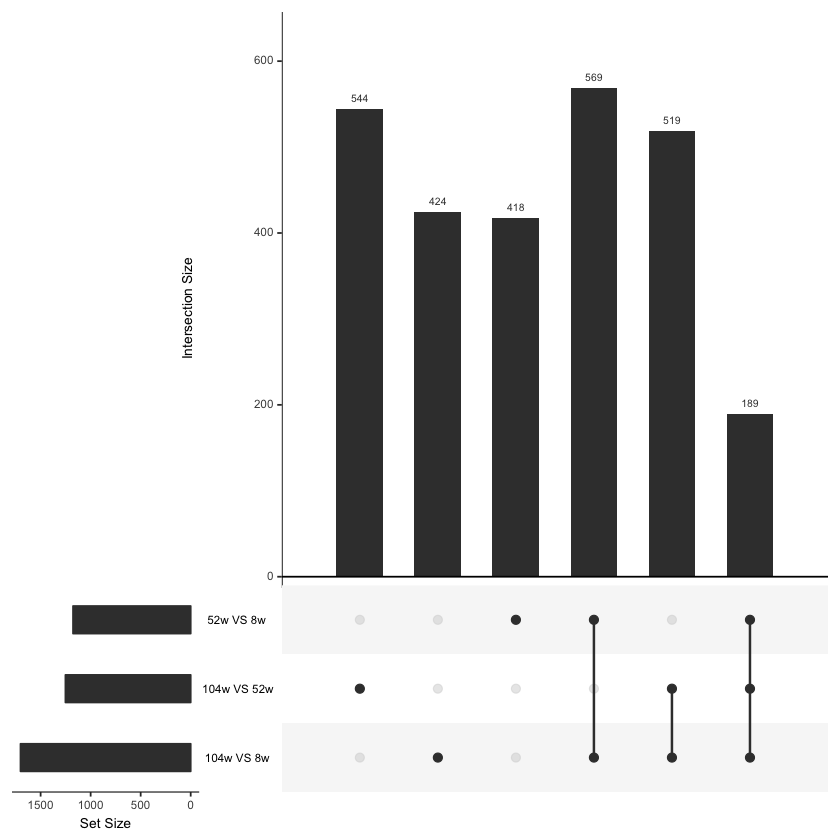

In [41]:
# Differentially more expressed genes
upset(as.data.frame(age_deg$pos))

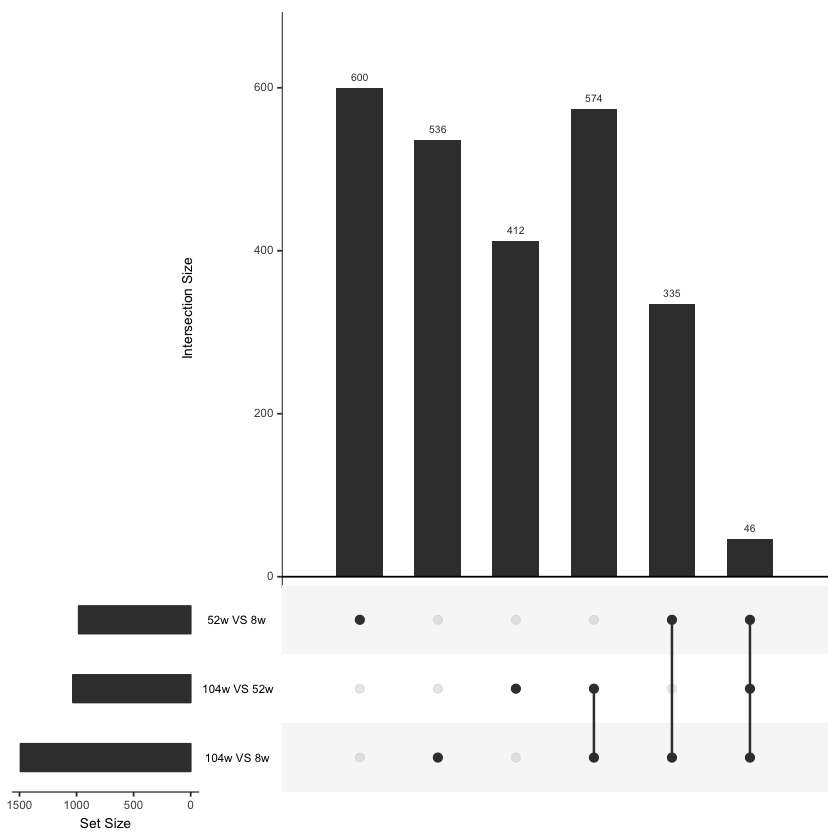

In [42]:
# Differentially less expressed genes
upset(as.data.frame(age_deg$neg))

## Compare the intersections in term of expressions

Warning message in heatmap.2(fc, Colv = NA, scale = "column", cexCol = 0.5, symbreaks = T):
“Discrepancy: Colv is FALSE, while dendrogram is `both'. Omitting column dendogram.”

52w > 8w & 104w > 8w 52w > 8w & 104w < 8w 52w < 8w & 104w > 8w
[1,] 563                  0                    0                   
     52w < 8w & 104w < 8w
[1,] 329

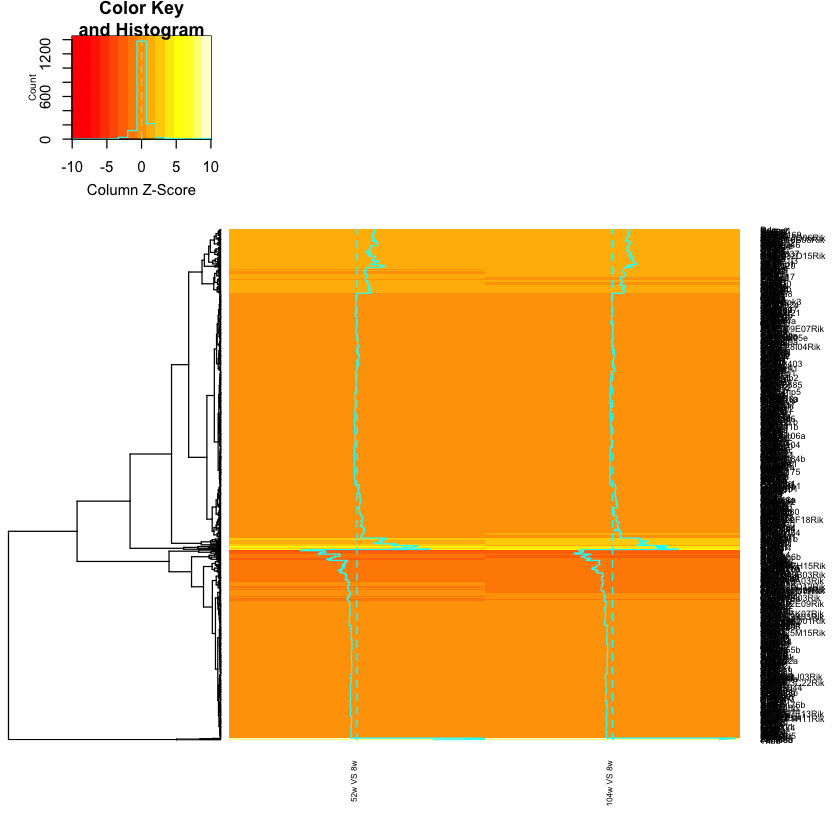

In [43]:
# Genes that are differentially expressed in 52W vs 8W and in 104W vs 8W (and not in 104w vs 52w)
fc = age_deg$fc_deg[!is.na(age_deg$fc_deg[,1]) & !is.na(age_deg$fc_deg[,2]) & is.na(age_deg$fc_deg[,3]),c(1,2)]
heatmap.2(fc, Colv = NA, scale="column", cexCol=0.5, symbreaks=T)
rep = get_repartition(fc)
colnames(rep) = c("52w > 8w & 104w > 8w", "52w > 8w & 104w < 8w", "52w < 8w & 104w > 8w", "52w < 8w & 104w < 8w")
rep

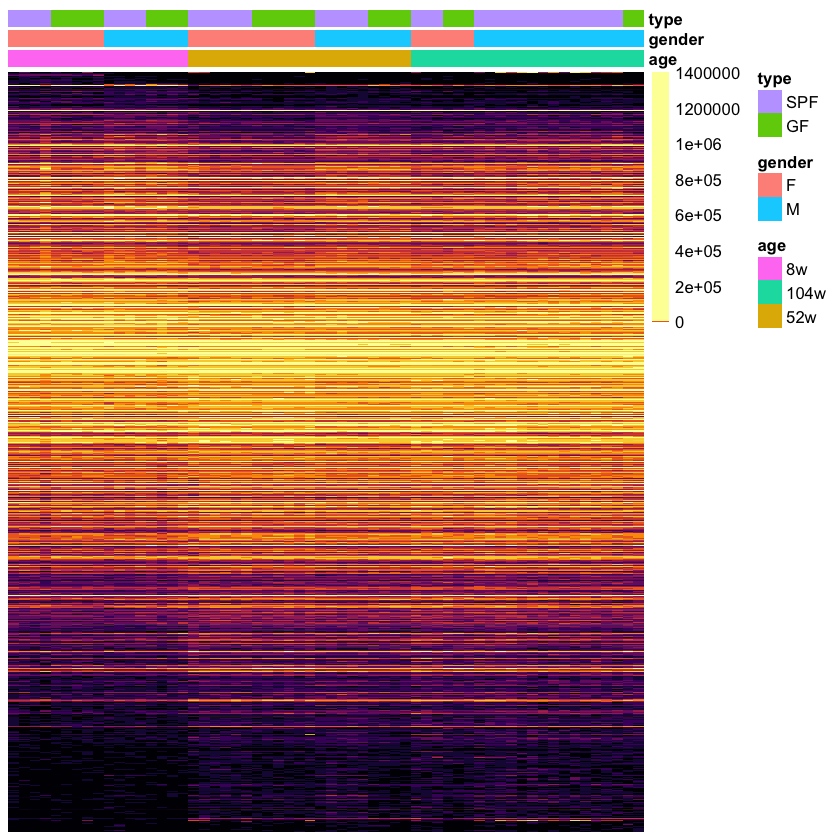

In [44]:
# 52w != 8w and 104w != 8w and 104w == 52w with abs(FC) > 1
genes = names((sort(age_deg$fc_deg[which(abs(age_deg$fc_deg[,1])>0 & abs(age_deg$fc_deg[,2])>0 & is.na(age_deg$fc_deg[,3])),1])))
plot_count_heatmap(genes,samples, annot)

Warning message in heatmap.2(fc, Colv = NA, scale = "column", cexCol = 0.5, symbreaks = T):
“Discrepancy: Colv is FALSE, while dendrogram is `both'. Omitting column dendogram.”

52w > 8w & 104w > 52w 52w > 8w & 104w < 52w 52w < 8w & 104w > 52w
[1,] 0                     107                   275                  
     52w < 8w & 104w < 52w
[1,] 0

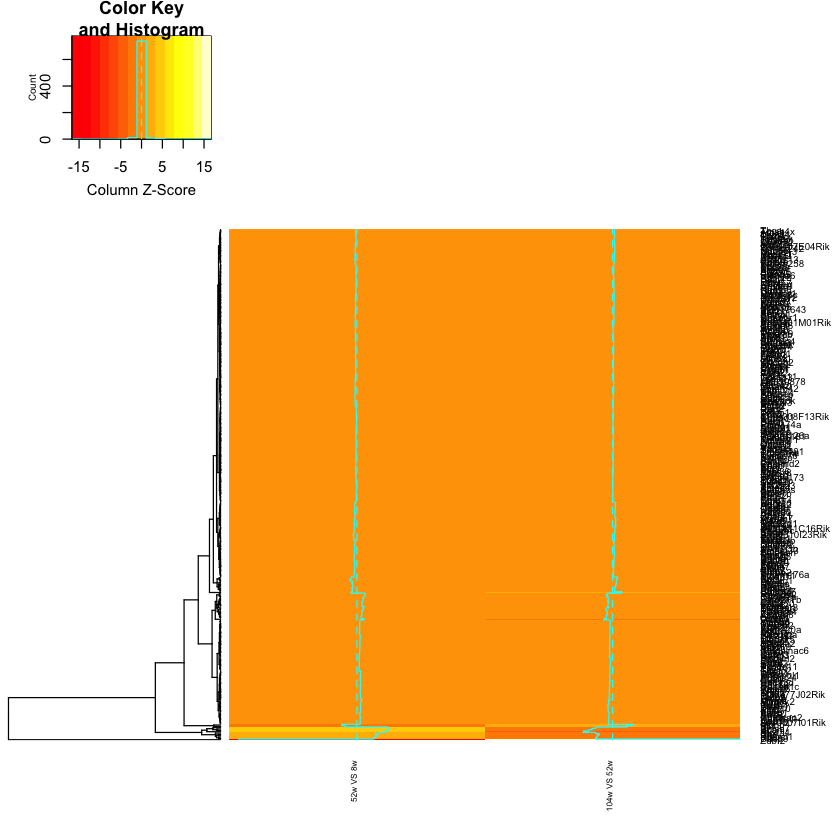

In [45]:
# Genes that are differentially expressed in 52W vs 8W and in 104W vs 52W (and not in 104w vs 52w)
fc = age_deg$fc_deg[!is.na(age_deg$fc_deg[,1]) & is.na(age_deg$fc_deg[,2]) & !is.na(age_deg$fc_deg[,3]),c(1,3)]
heatmap.2(fc, Colv = NA, scale="column", cexCol=0.5, symbreaks=T)
rep = get_repartition(fc)
colnames(rep) = c("52w > 8w & 104w > 52w", "52w > 8w & 104w < 52w", "52w < 8w & 104w > 52w", "52w < 8w & 104w < 52w")
rep

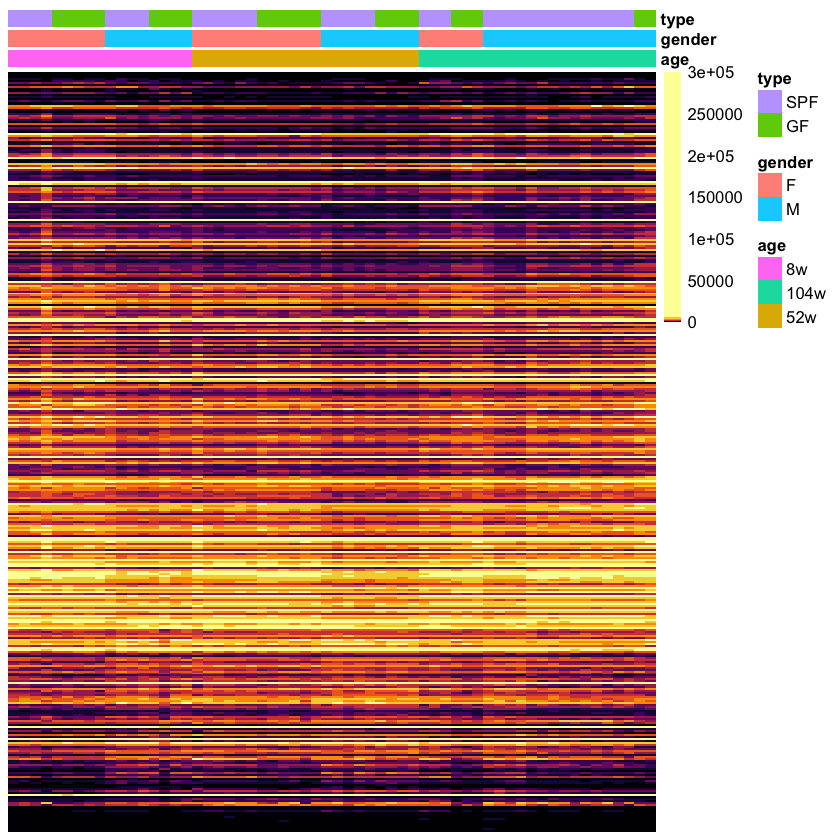

In [46]:
# 52w != 8w and 104w == 8w and 104w != 52w with abs(FC) > 1
genes = names((sort(age_deg$fc_deg[which(abs(age_deg$fc_deg[,1])>0 & is.na(age_deg$fc_deg[,2]) & abs(age_deg$fc_deg[,3])>0),1])))
plot_count_heatmap(genes,samples, annot)

Warning message in heatmap.2(fc, Colv = NA, scale = "column", cexCol = 0.5, symbreaks = T):
“Discrepancy: Colv is FALSE, while dendrogram is `both'. Omitting column dendogram.”

104w > 8w & 104w > 52w 104w > 8w & 104w < 52w 104w < 8w & 104w > 52w
[1,] 504                    0                      0                     
     104w < 8w & 104w < 52w
[1,] 567

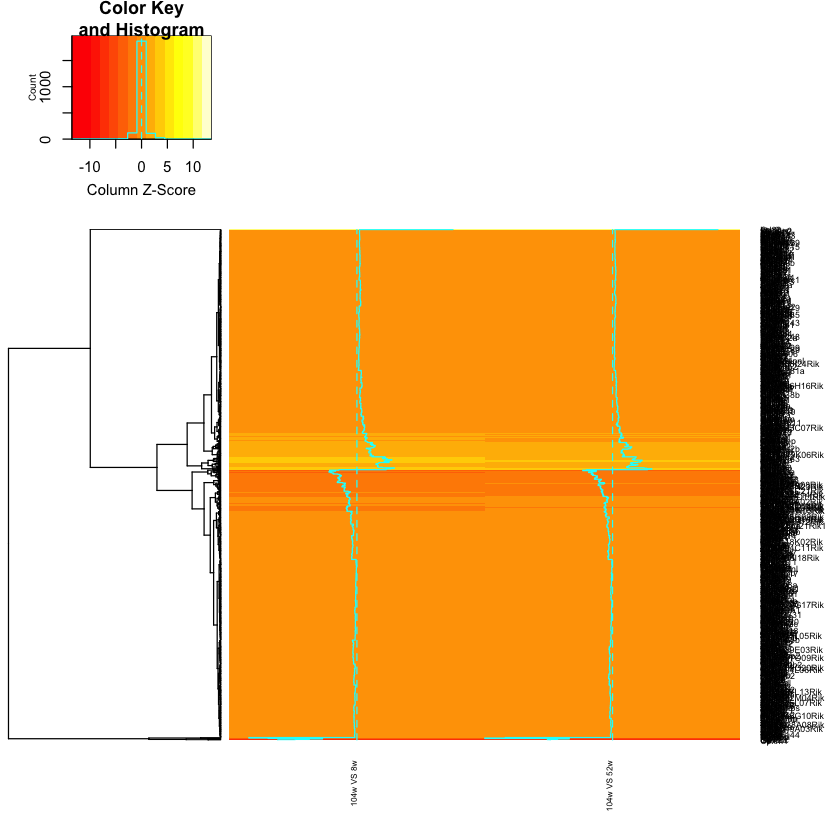

In [47]:
# Genes that are differentially expressed in 104W vs 8W and in 104W vs 52W (and not in 52w vs 8w)
fc = age_deg$fc_deg[is.na(age_deg$fc_deg[,1]) & !is.na(age_deg$fc_deg[,2]) & !is.na(age_deg$fc_deg[,3]),c(2,3)]
heatmap.2(fc, Colv = NA, scale="column", cexCol=0.5, symbreaks=T)
rep = get_repartition(fc)
colnames(rep) = c("104w > 8w & 104w > 52w", "104w > 8w & 104w < 52w", "104w < 8w & 104w > 52w", "104w < 8w & 104w < 52w")
rep

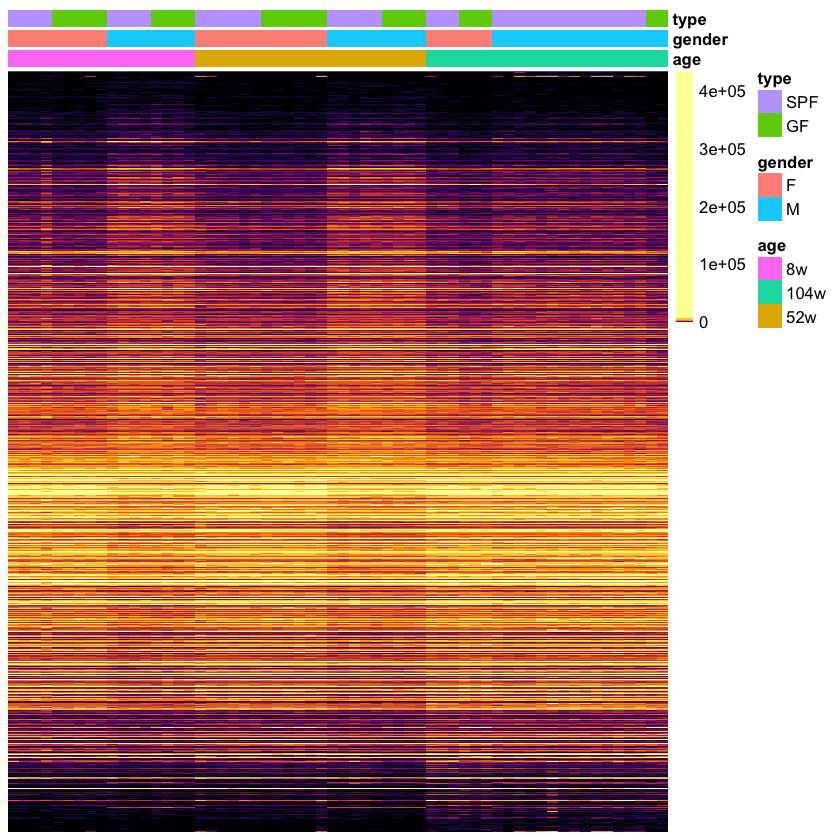

In [48]:
# 52w == 8w and 104w != 8w and 104w != 52w with abs(FC) > 1
genes = names((sort(age_deg$fc_deg[which(is.na(age_deg$fc_deg[,1]) & abs(age_deg$fc_deg[,2])>0 & abs(age_deg$fc_deg[,3])>0),2])))
plot_count_heatmap(genes,samples, annot)

Warning message in heatmap.2(fc, Colv = NA, scale = "column", cexCol = 0.5, symbreaks = T):
“Discrepancy: Colv is FALSE, while dendrogram is `both'. Omitting column dendogram.”

52w > 8w & 104w > 8w & 104w > 52w 52w > 8w & 104w > 8w & 104w < 52w
[1,] 189                               6                                
     52w > 8w & 104w < 8w & 104w > 52w 52w > 8w & 104w < 8w & 104w < 52w
[1,] 0                                 7                                
     52w < 8w & 104w > 8w & 104w > 52w 52w < 8w & 104w > 8w & 104w < 52w
[1,] 15                                0                                
     52w < 8w & 104w < 8w & 104w > 52w 52w < 8w & 104w < 8w & 104w < 52w
[1,] 6                                 46

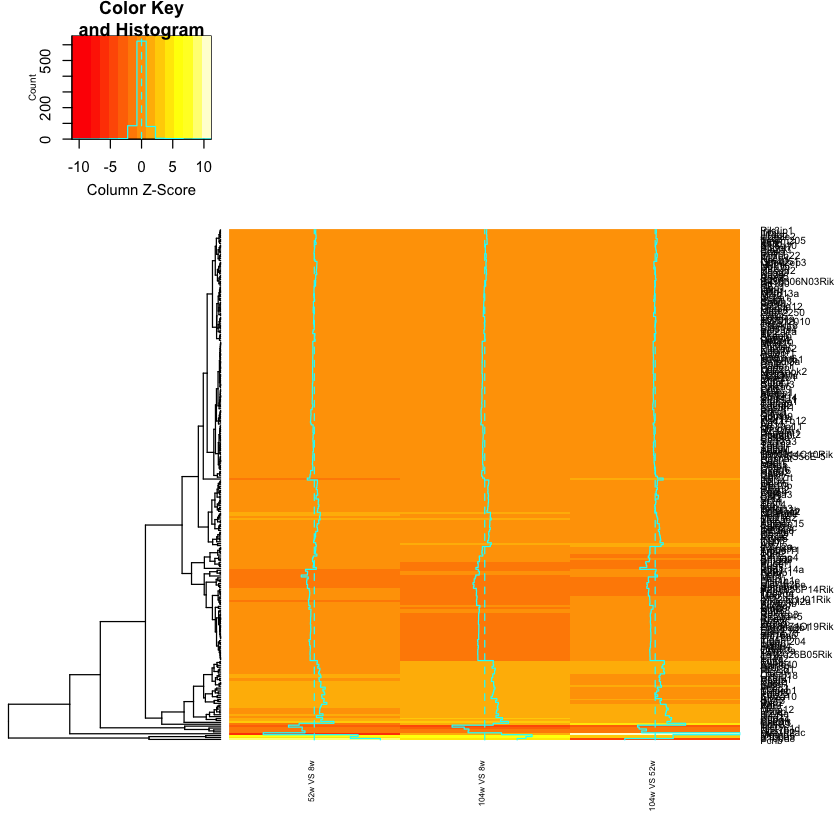

In [49]:
# Genes that are differentially expressed in 52W vs 8W, in 104W vs 8W and in 104W vs 52W
fc = age_deg$fc_deg[!is.na(age_deg$fc_deg[,1]) & !is.na(age_deg$fc_deg[,2]) & !is.na(age_deg$fc_deg[,3]),c(1,2,3)]
heatmap.2(fc, Colv = NA, scale="column", cexCol=0.5, symbreaks=T)
rep = get_repartition_3col(fc)
colnames(rep) = c(
    "52w > 8w & 104w > 8w & 104w > 52w",
    "52w > 8w & 104w > 8w & 104w < 52w",
    "52w > 8w & 104w < 8w & 104w > 52w",
    "52w > 8w & 104w < 8w & 104w < 52w",
    "52w < 8w & 104w > 8w & 104w > 52w",
    "52w < 8w & 104w > 8w & 104w < 52w",
    "52w < 8w & 104w < 8w & 104w > 52w",
    "52w < 8w & 104w < 8w & 104w < 52w")
rep

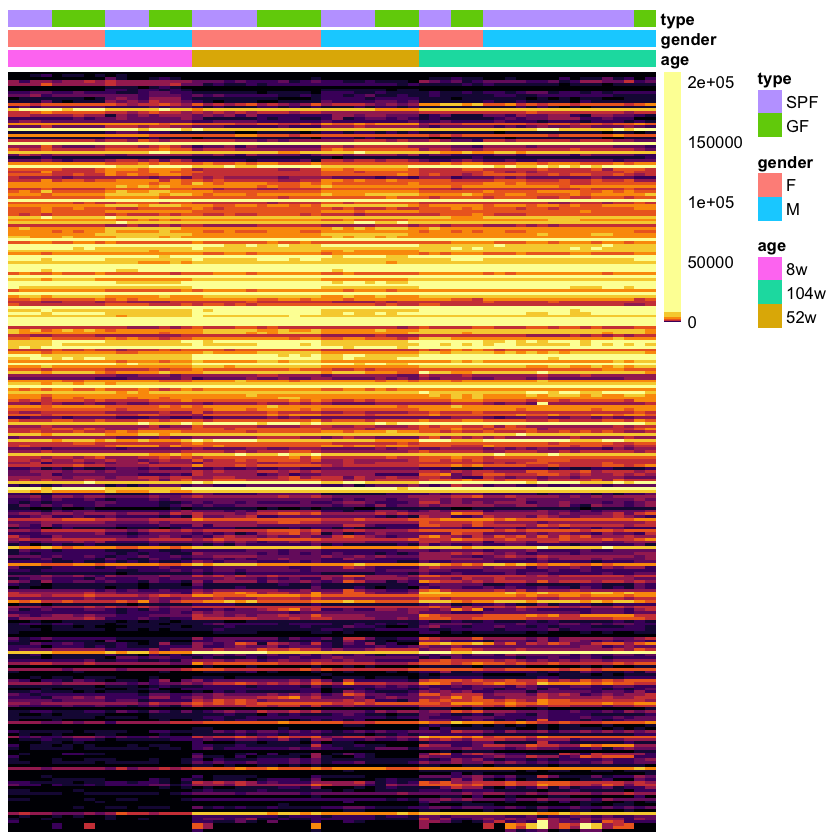

In [50]:
# 52w != 8w and 104w != 8w and 104w != 52w with abs(FC) > 1
genes = names((sort(age_deg$fc_deg[which(abs(age_deg$fc_deg[,1])>0 & abs(age_deg$fc_deg[,2])>0 & abs(age_deg$fc_deg[,3])>0),1])))
plot_count_heatmap(genes,samples, annot)

# Comparison between the ages for the types (after controlling for gender)

Questions

- What are the differences between the ages for the different types
- Do we observe the same changes as globally?

In [115]:
age_type_data = list(SPF_52w_8w, GF_52w_8w, SPF_104w_8w, GF_104w_8w, SPF_104w_52w, GF_104w_52w)
names(age_type_data) = c("52w VS 8w (SPF)", "52w VS 8w (GF)", "104w VS 8w (SPF)", "104w VS 8w (GF)", "104w VS 52w (SPF)", "104w VS 52w (GF)")
age_type_deg = extract_diff_expr_genes(age_type_data, "age_type_data")

Can't find mm10/geneSymbol length data in genLenDataBase...
Warning message in grep(txdbPattern, installedPackages):
“argument 'pattern' has length > 1 and only the first element will be used”Found the annotaion package, TxDb.Mmusculus.UCSC.mm10.knownGene
Trying to get the gene lengths from it.
Warning message in pcls(G):
“initial point very close to some inequality constraints”Can't find mm10/geneSymbol length data in genLenDataBase...
Warning message in grep(txdbPattern, installedPackages):
“argument 'pattern' has length > 1 and only the first element will be used”Found the annotaion package, TxDb.Mmusculus.UCSC.mm10.knownGene
Trying to get the gene lengths from it.
Warning message in pcls(G):
“initial point very close to some inequality constraints”Can't find mm10/geneSymbol length data in genLenDataBase...
Warning message in grep(txdbPattern, installedPackages):
“argument 'pattern' has length > 1 and only the first element will be used”Found the annotaion package, TxDb.Mmusculus.UC

In [116]:
SPF_samples = c(
    'SPF_8w_F_1_2','SPF_8w_F_3_2','SPF_8w_F_4_2','SPF_8w_F_5_2','SPF_8w_M_1_2','SPF_8w_M_2_2','SPF_8w_M_3_2','SPF_8w_M_4_2',
    'SPF_52w_F_1_2','SPF_52w_F_2_2','SPF_52w_F_3_2','SPF_52w_F_4_2','SPF_52w_F_5_2','SPF_52w_F_6_2','SPF_52w_M_1_2','SPF_52w_M_2_2','SPF_52w_M_3_2','SPF_52w_M_4_2','SPF_52w_M_5_2',
    'SPF_104w_F_1_2','SPF_104w_F_2_2','SPF_104w_F_3_2','SPF_104w_M_1_2','SPF_104w_M_2_2','SPF_104w_M_3_2','SPF_104w_M_4_2','SPF_104w_M_5_2','SPF_104w_M_6_2','SPF_104w_M_7_2','SPF_104w_M_8_2','SPF_104w_M_9_2','SPF_104w_M_10_2','SPF_104w_M_11_2','SPF_104w_M_12_2','SPF_104w_M_13_2','SPF_104w_M_14_2')
GF_samples = c(
    'GF_8w_F_1_2','GF_8w_F_2_2','GF_8w_F_3_2','GF_8w_F_4_2','GF_8w_F_5_2','GF_8w_M_1_2','GF_8w_M_2_2','GF_8w_M_3_2','GF_8w_M_4_2',
    'GF_52w_F_1_2','GF_52w_F_2_2','GF_52w_F_3_2','GF_52w_F_4_2','GF_52w_F_5_2','GF_52w_F_6_2','GF_52w_M_1_2','GF_52w_M_2_2','GF_52w_M_3_2','GF_52w_M_4_2',
    'GF_104w_F_1_2','GF_104w_F_2_2','GF_104w_F_3_2','GF_104w_M_1_2','GF_104w_M_2_2')
annot = as.data.frame(colData(dge)[, c("age", "gender")])

## Counts

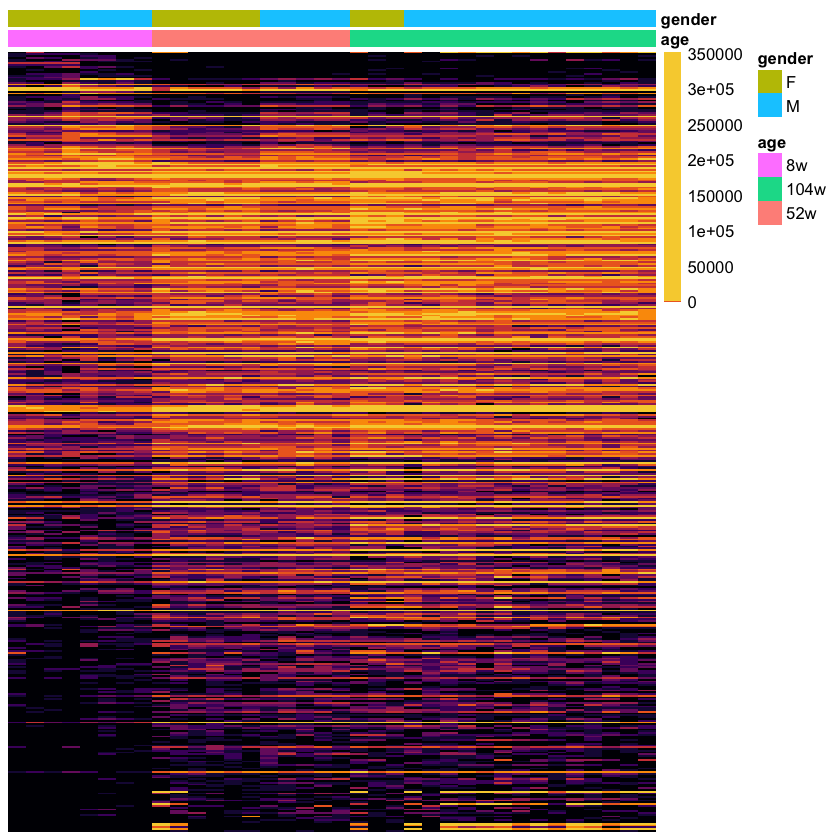

In [117]:
# 52w != 8w or 104w != 8w or 104w != 52w for SPF with abs(FC) > 2
genes = names((sort(age_type_deg$fc_deg[which(abs(age_type_deg$fc_deg[,1])>1 | abs(age_type_deg$fc_deg[,3])>1 | abs(age_type_deg$fc_deg[,5])>1),1])))
plot_count_heatmap(genes,SPF_samples, annot)

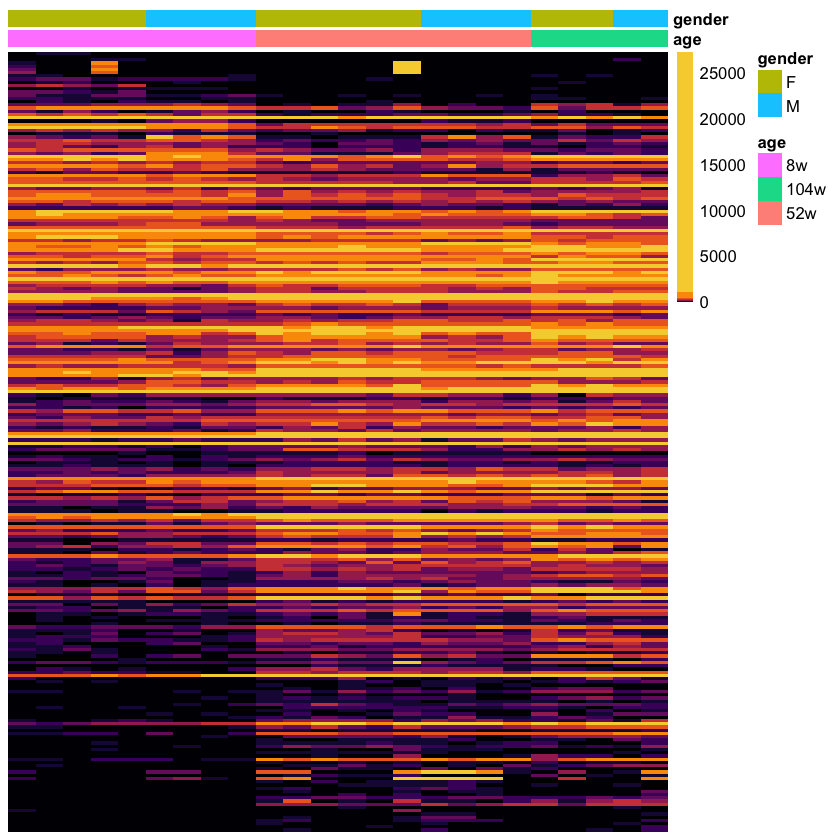

In [118]:
# 52w != 8w or 104w != 8w or 104w != 52w for GF with abs(FC) > 2
genes = names((sort(age_type_deg$fc_deg[which(abs(age_type_deg$fc_deg[,2])>1 | abs(age_type_deg$fc_deg[,4])>1 | abs(age_type_deg$fc_deg[,6])>1),2])))
plot_count_heatmap(genes,GF_samples, annot)

## Comparison of the numbers per types

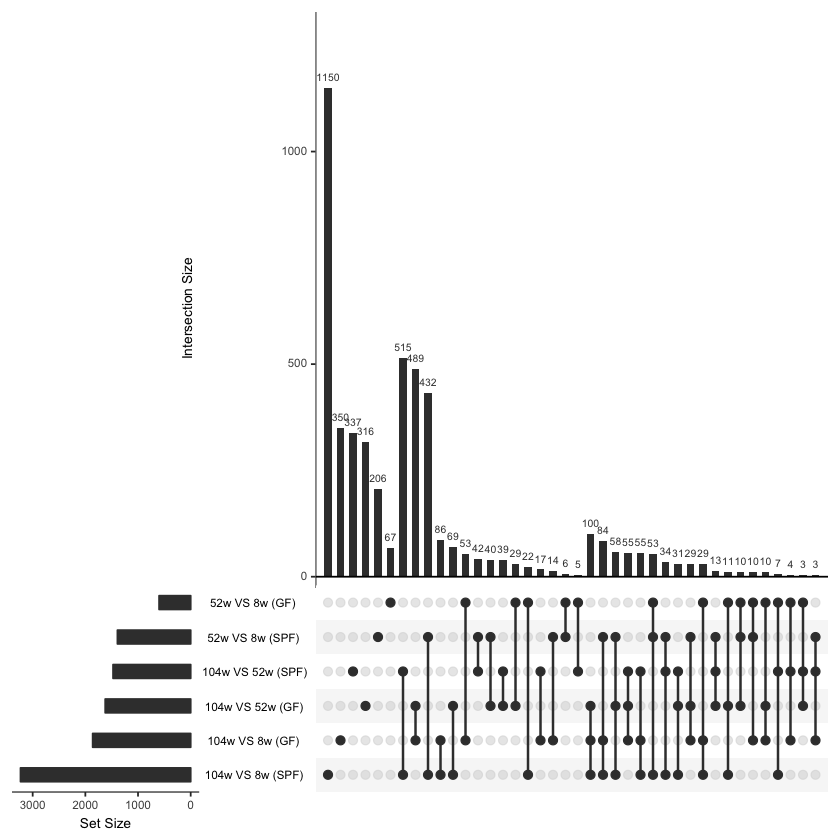

In [55]:
# Differentially expressed genes
upset(as.data.frame(age_type_deg$deg),nsets = 6)

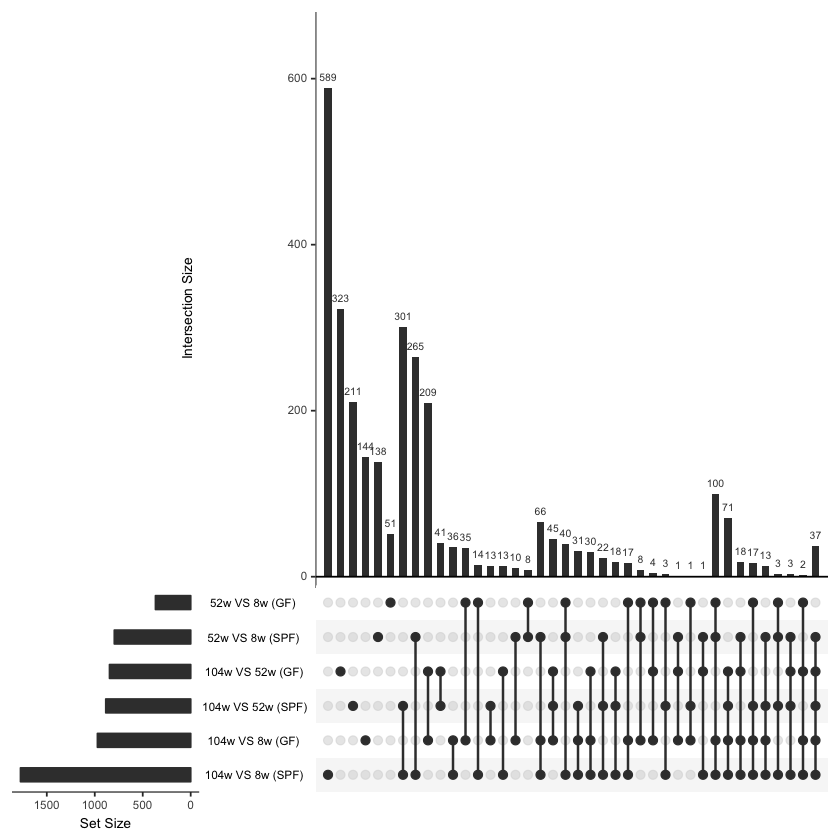

In [56]:
# Differentially more expressed genes
upset(as.data.frame(age_type_deg$pos),nsets = 6)

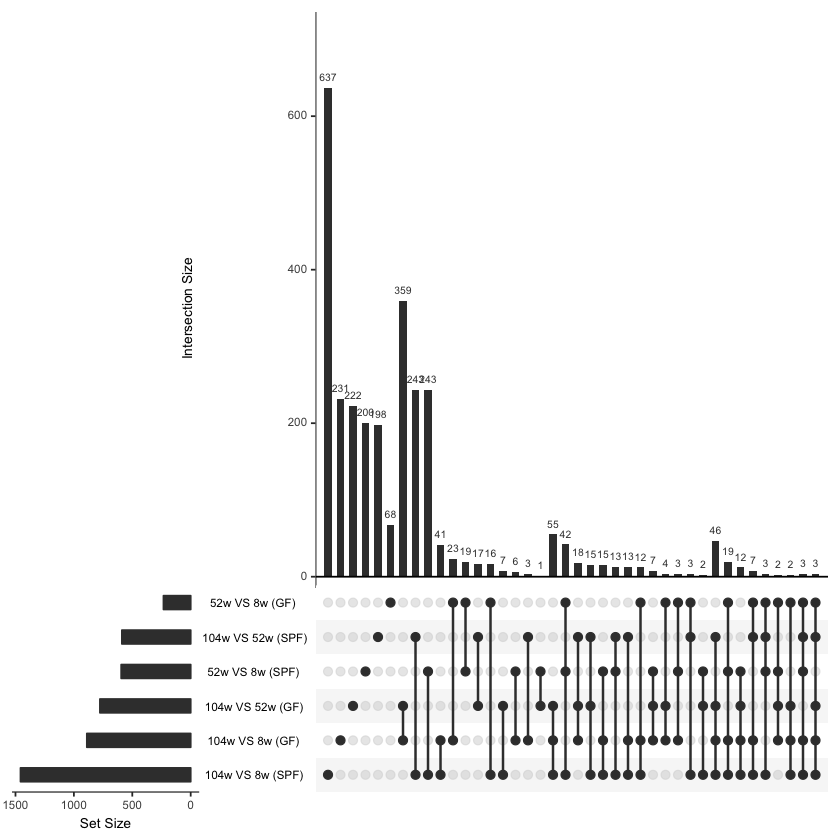

In [57]:
# Differentially less expressed genes
upset(as.data.frame(age_type_deg$neg),nsets = 6)

## Comparison with the global numbers

### 52w vs 8w

In [58]:
# 52w vs 8w
type_data_52w_8w = list(SPF_52w_8w, GF_52w_8w, global_52w_8w)
names(type_data_52w_8w) = c("52w VS 8w (SPF)", "52w VS 8w (GF)", "52w VS 8w (global)")
type_deg_52w_8w = extract_diff_expr_genes(type_data_52w_8w, "type_data_52w_8w")

Can't find mm10/geneSymbol length data in genLenDataBase...
Warning message in grep(txdbPattern, installedPackages):
“argument 'pattern' has length > 1 and only the first element will be used”Found the annotaion package, TxDb.Mmusculus.UCSC.mm10.knownGene
Trying to get the gene lengths from it.
Warning message in pcls(G):
“initial point very close to some inequality constraints”Can't find mm10/geneSymbol length data in genLenDataBase...
Warning message in grep(txdbPattern, installedPackages):
“argument 'pattern' has length > 1 and only the first element will be used”Found the annotaion package, TxDb.Mmusculus.UCSC.mm10.knownGene
Trying to get the gene lengths from it.
Warning message in pcls(G):
“initial point very close to some inequality constraints”Can't find mm10/geneSymbol length data in genLenDataBase...
Warning message in grep(txdbPattern, installedPackages):
“argument 'pattern' has length > 1 and only the first element will be used”Found the annotaion package, TxDb.Mmusculus.UC

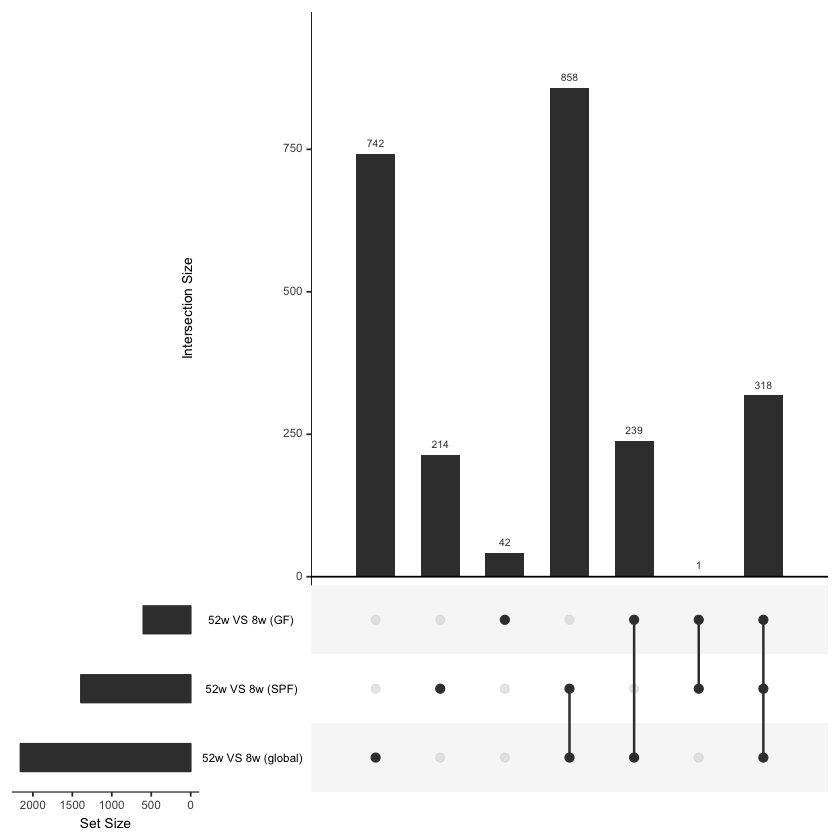

In [59]:
# Differentially expressed genes
upset(as.data.frame(type_deg_52w_8w$deg))

### 104w vs 8w

In [60]:
type_data_104w_8w = list(SPF_104w_8w, GF_104w_8w, global_104w_8w)
names(type_data_104w_8w) = c("104w VS 8w (SPF)", "104w VS 8w (GF)", "104w VS 8w (global)")
type_deg_104w_8w = extract_diff_expr_genes(type_data_104w_8w, "type_data_104w_8w")

Can't find mm10/geneSymbol length data in genLenDataBase...
Warning message in grep(txdbPattern, installedPackages):
“argument 'pattern' has length > 1 and only the first element will be used”Found the annotaion package, TxDb.Mmusculus.UCSC.mm10.knownGene
Trying to get the gene lengths from it.
Warning message in pcls(G):
“initial point very close to some inequality constraints”Can't find mm10/geneSymbol length data in genLenDataBase...
Warning message in grep(txdbPattern, installedPackages):
“argument 'pattern' has length > 1 and only the first element will be used”Found the annotaion package, TxDb.Mmusculus.UCSC.mm10.knownGene
Trying to get the gene lengths from it.
Warning message in pcls(G):
“initial point very close to some inequality constraints”Can't find mm10/geneSymbol length data in genLenDataBase...
Warning message in grep(txdbPattern, installedPackages):
“argument 'pattern' has length > 1 and only the first element will be used”Found the annotaion package, TxDb.Mmusculus.UC

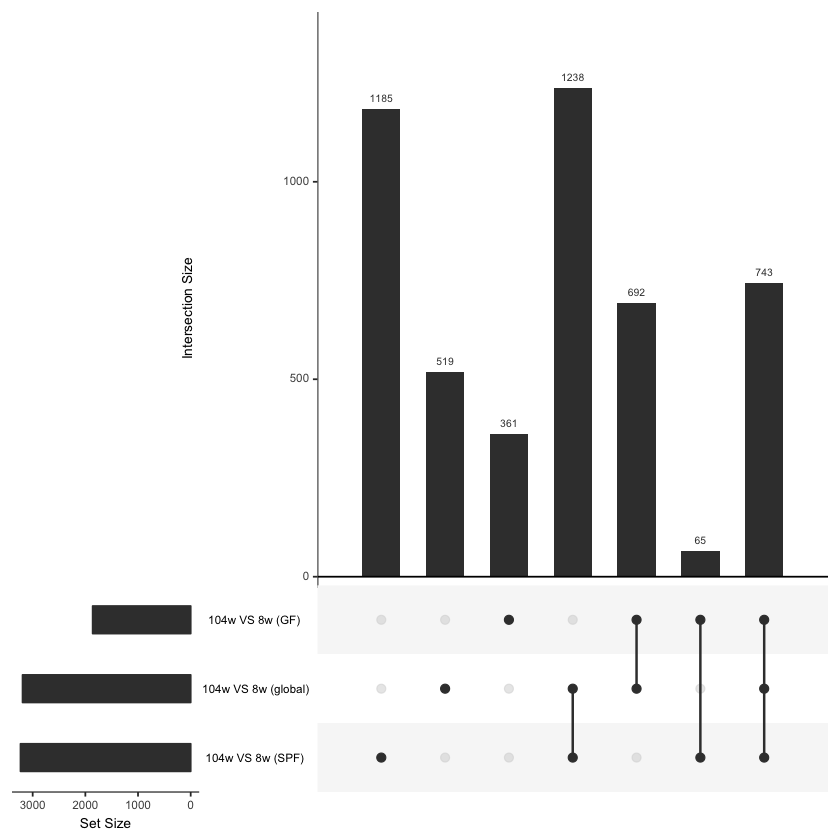

In [61]:
# Differentially expressed genes
upset(as.data.frame(type_deg_104w_8w$deg))

### 104w vs 52w

In [62]:
type_data_104w_52w = list(SPF_104w_52w, GF_104w_52w, global_104w_52w)
names(type_data_104w_52w) = c("104w VS 52w (SPF)", "104w VS 52w (GF)", "104w VS 52w (global)")
type_deg_104w_52w = extract_diff_expr_genes(type_data_104w_52w, "type_data_104w_52w")

Can't find mm10/geneSymbol length data in genLenDataBase...
Warning message in grep(txdbPattern, installedPackages):
“argument 'pattern' has length > 1 and only the first element will be used”Found the annotaion package, TxDb.Mmusculus.UCSC.mm10.knownGene
Trying to get the gene lengths from it.
Warning message in pcls(G):
“initial point very close to some inequality constraints”Can't find mm10/geneSymbol length data in genLenDataBase...
Warning message in grep(txdbPattern, installedPackages):
“argument 'pattern' has length > 1 and only the first element will be used”Found the annotaion package, TxDb.Mmusculus.UCSC.mm10.knownGene
Trying to get the gene lengths from it.
Warning message in pcls(G):
“initial point very close to some inequality constraints”Can't find mm10/geneSymbol length data in genLenDataBase...
Warning message in grep(txdbPattern, installedPackages):
“argument 'pattern' has length > 1 and only the first element will be used”Found the annotaion package, TxDb.Mmusculus.UC

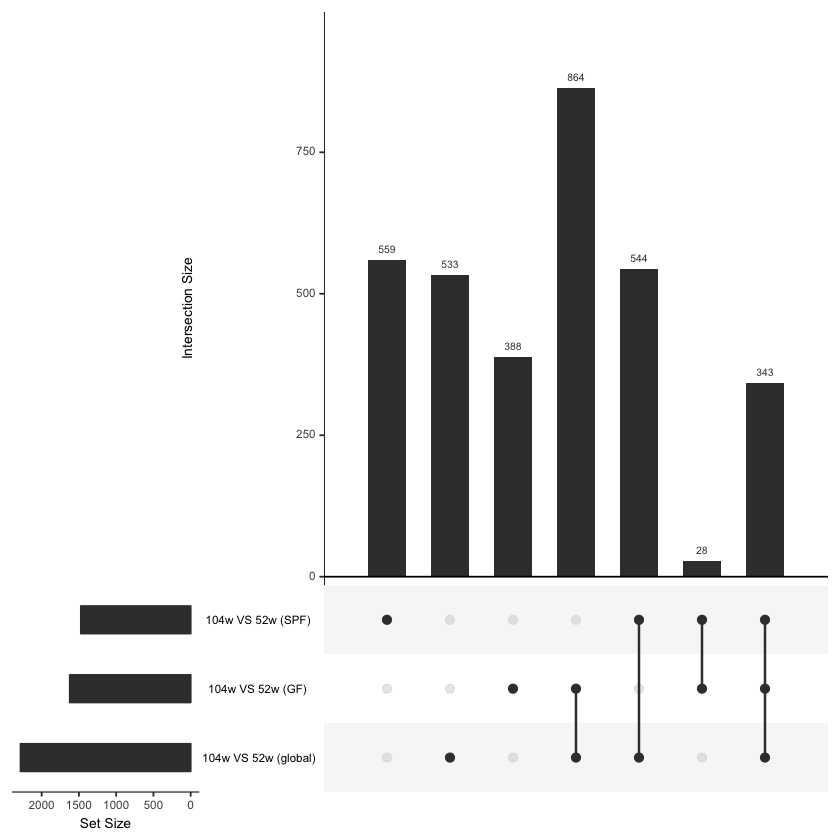

In [63]:
# Differentially expressed genes
upset(as.data.frame(type_deg_104w_52w$deg))

## SPF effect in aging

Question: Is there any genes that shows an increasing fold change in SPF with aging while not for GF?

| 52w vs 8w for SPF | 52w vs 8w for GF | 104w vs 52w for SPF | 104w vs 52w for GF | Gene number
--- | --- | --- | --- | --- | ---
Set 1 | != |  | != |  | 244
Set 2 | != | == | != | == | 92 


In [129]:
# set extractions
set1 = rownames(age_type_deg$fc_deg[!is.na(age_type_deg$fc_deg[,1]) & !is.na(age_type_deg$fc_deg[,5]),])
set2 = rownames(age_type_deg$fc_deg[!is.na(age_type_deg$fc_deg[,1]) & is.na(age_type_deg$fc_deg[,2]) & !is.na(age_type_deg$fc_deg[,5]) & is.na(age_type_deg$fc_deg[,6]),])
# gene numbers
res = matrix(0,ncol = 1, nrow=2, dimnames=list(c("Set 1", "Set 2"),c("Gene number")))
res[1,1] = length(set1)
res[2,1] = length(set2)
res
# log2FC
set1_fc = age_type_deg$fc_deg[set1,]
set1_fc[is.na(set1_fc)] = 0
set2_fc = age_type_deg$fc_deg[set2,]
set2_fc[is.na(set2_fc)] = 0

Gene number
Set 1 244        
Set 2  92

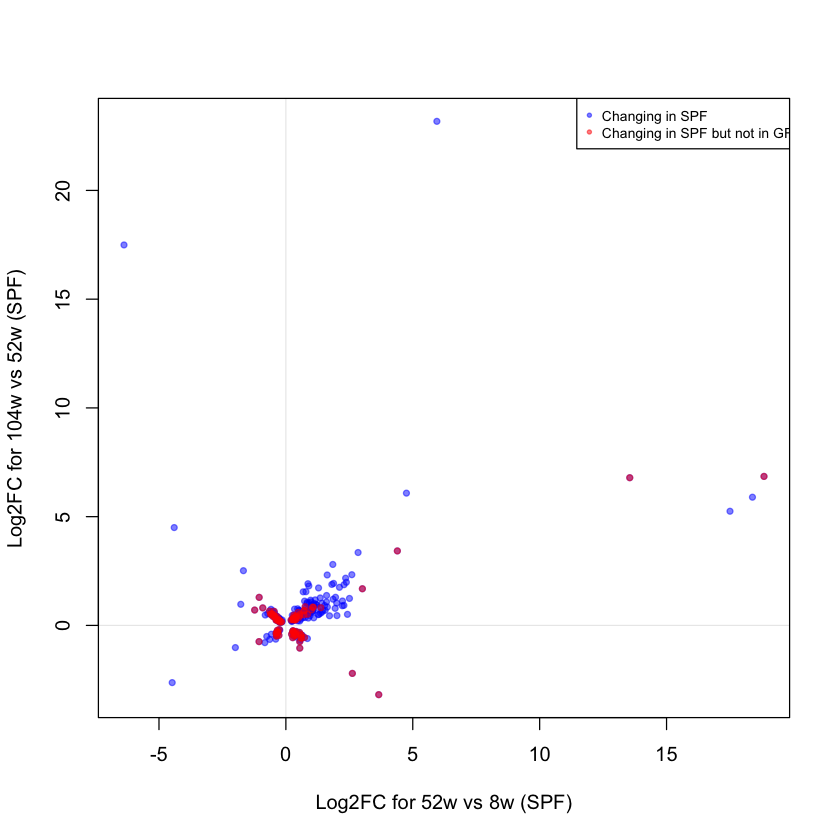

In [134]:
# plots of the differences
plot(set1_fc[,"52w VS 8w (SPF)"], set1_fc[,"104w VS 52w (SPF)"], xlab = "Log2FC for 52w vs 8w (SPF)", ylab= "Log2FC for 104w vs 52w (SPF)", pch = 20, col = rgb(0,0,1,alpha=0.5))
points(set2_fc[,"52w VS 8w (SPF)"], set2_fc[,"104w VS 52w (SPF)"], pch = 20, col = rgb(1,0,0,alpha=0.5))
legend("topright", pch = 20, col = c(rgb(0,0,1,alpha=0.5),rgb(1,0,0,alpha=0.5)), legend=c("Changing in SPF", "Changing in SPF but not in GF"), cex = 0.7)
abline(h = 0, col = rgb(0,0,0,alpha=0.1))
abline(v = 0, col = rgb(0,0,0,alpha=0.1))

### Genes with differential expression with aging in SPF but not in GF

In [136]:
aging_SPF_diff = cbind(set2_fc[,"52w VS 8w (SPF)"], set2_fc[,"104w VS 52w (SPF)"])
colnames(aging_SPF_diff) = c("52w VS 8w (SPF)","104w VS 52w (SPF)")

[1] 33

	Pearson's product-moment correlation

data:  mat[, 1] and mat[, 2]
t = 23.489, df = 31, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.9456141 0.9867280
sample estimates:
      cor 
0.9730381 



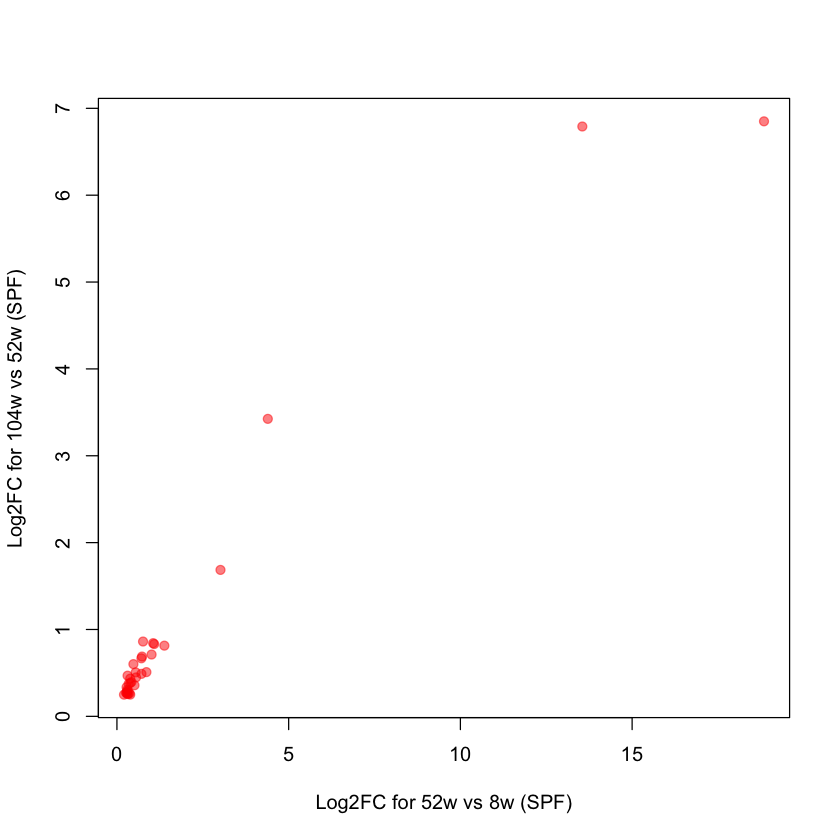

In [150]:
# 52w VS 8w (SPF) > 0 and 104w VS 52w (SPF) > 0
pos_1_pos_2 = aging_SPF_diff[aging_SPF_diff[,"52w VS 8w (SPF)"]>0 & aging_SPF_diff[,"104w VS 52w (SPF)"]>0,]
investigate_gene_set(pos_1_pos_2)
plot(pos_1_pos_2, col = rgb(1,0,0,alpha=0.5), pch = 19, xlab = "Log2FC for 52w vs 8w (SPF)", ylab= "Log2FC for 104w vs 52w (SPF)")

[1] 23

	Pearson's product-moment correlation

data:  mat[, 1] and mat[, 2]
t = -19.401, df = 21, p-value = 6.881e-15
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.9887658 -0.9368473
sample estimates:
       cor 
-0.9732205 



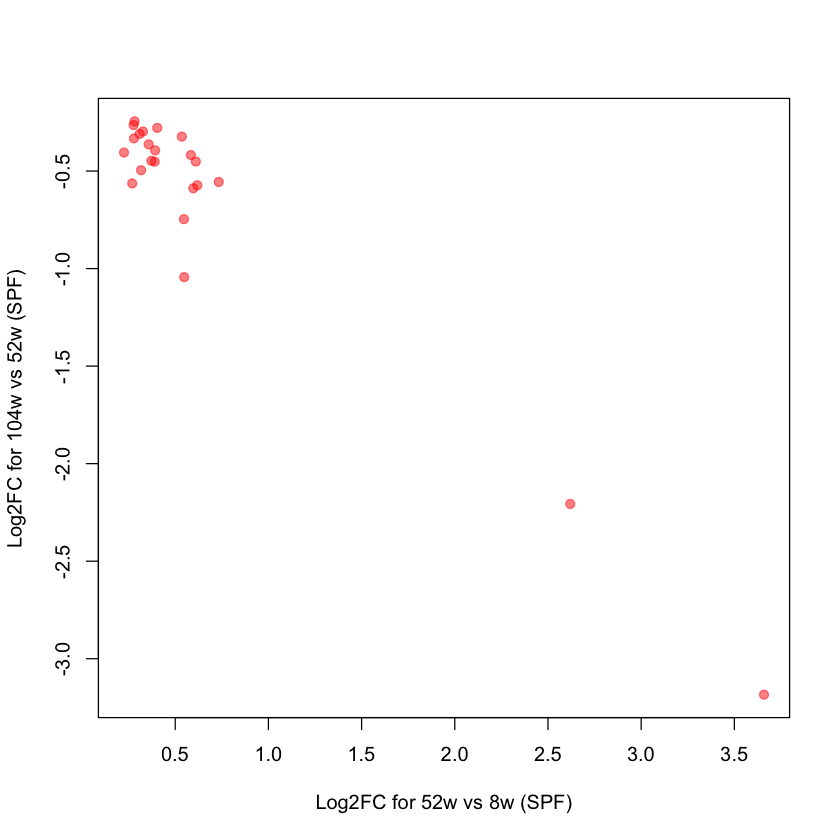

In [149]:
# 52w VS 8w (SPF) > 0 and 104w VS 52w (SPF) < 0
pos_1_neg_2 = aging_SPF_diff[aging_SPF_diff[,"52w VS 8w (SPF)"]>0 & aging_SPF_diff[,"104w VS 52w (SPF)"]<0,]
investigate_gene_set(pos_1_neg_2)
plot(pos_1_neg_2, col = rgb(1,0,0,alpha=0.5), pch = 19, xlab = "Log2FC for 52w vs 8w (SPF)", ylab= "Log2FC for 104w vs 52w (SPF)")

[1] 24

	Pearson's product-moment correlation

data:  mat[, 1] and mat[, 2]
t = -8.1923, df = 22, p-value = 3.971e-08
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.9415922 -0.7145938
sample estimates:
       cor 
-0.8678267 



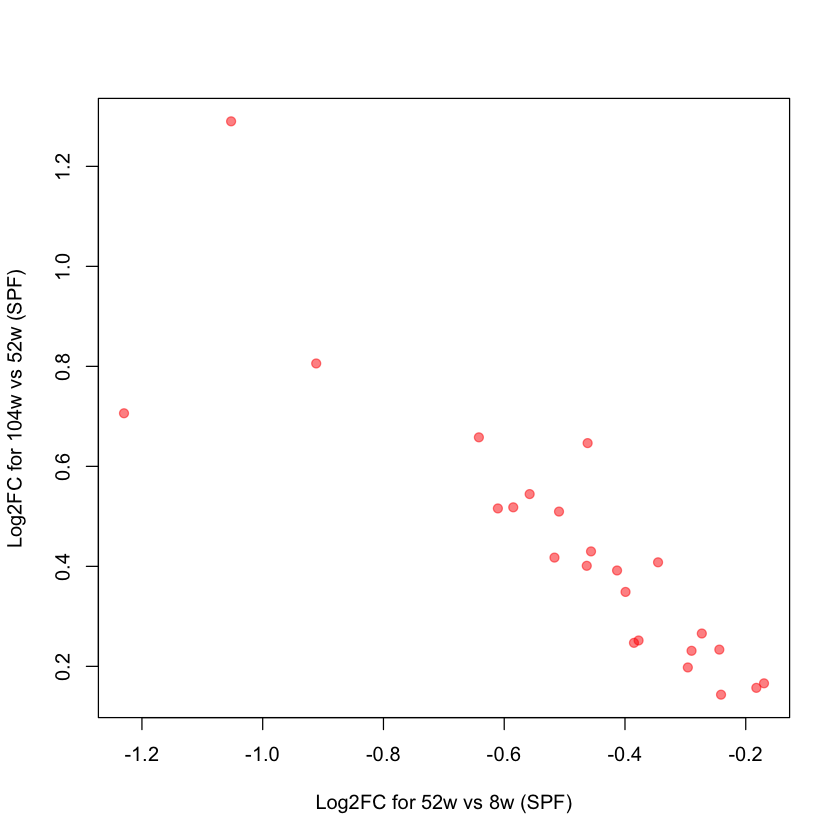

In [148]:
# 52w VS 8w (SPF) < 0 and 104w VS 52w (SPF) > 0
neg_1_pos_2 = aging_SPF_diff[aging_SPF_diff[,"52w VS 8w (SPF)"]<0 & aging_SPF_diff[,"104w VS 52w (SPF)"]>0,]
investigate_gene_set(neg_1_pos_2)
plot(neg_1_pos_2, col = rgb(1,0,0,alpha=0.5), pch = 19, xlab = "Log2FC for 52w vs 8w (SPF)", ylab= "Log2FC for 104w vs 52w (SPF)")

[1] 12

	Pearson's product-moment correlation

data:  mat[, 1] and mat[, 2]
t = 4.3999, df = 10, p-value = 0.001335
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.4459551 0.9453668
sample estimates:
      cor 
0.8120303 



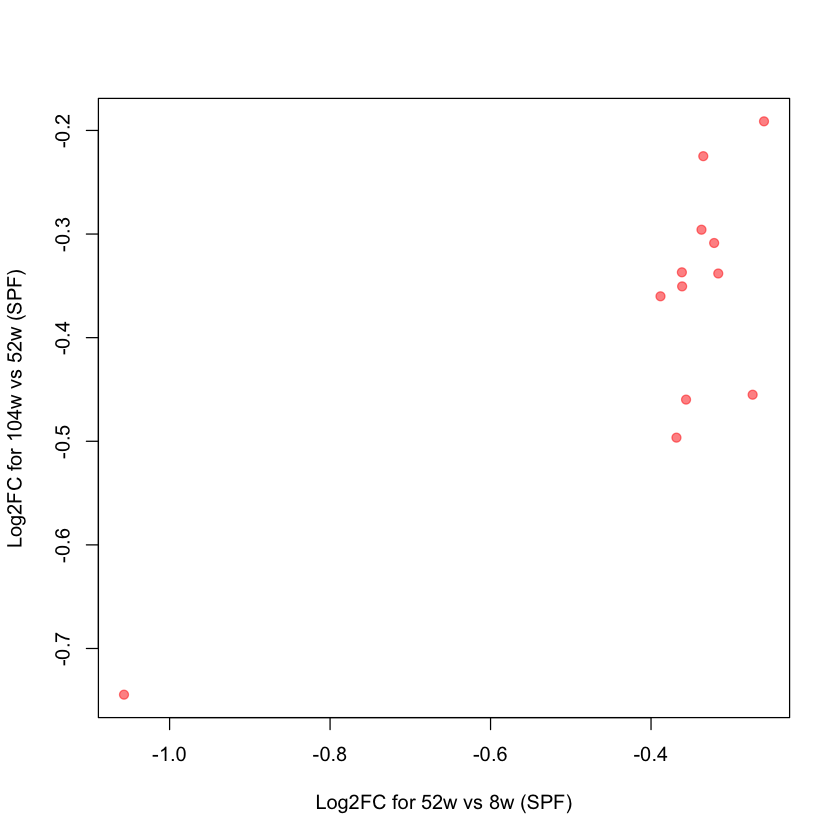

In [147]:
# 52w VS 8w (SPF) < 0 and 104w VS 52w (SPF) < 0
neg_1_neg_2 = aging_SPF_diff[aging_SPF_diff[,"52w VS 8w (SPF)"]<0 & aging_SPF_diff[,"104w VS 52w (SPF)"]<0,]
investigate_gene_set(neg_1_neg_2)
plot(neg_1_neg_2, col = rgb(1,0,0,alpha=0.5), pch = 19, xlab = "Log2FC for 52w vs 8w (SPF)", ylab= "Log2FC for 104w vs 52w (SPF)")

![](../results/dge/img/male_delayed_genes.png)

# Comparison between the ages for the genders (after controlling for type)

Questions

- What are the differences between the ages for the different genders?
- Do we observe the same changes as globally?

In [32]:
age_gender_data = list(F_52w_8w, M_52w_8w, F_104w_8w, M_104w_8w, F_104w_52w, M_104w_52w)
names(age_gender_data) = c("52w VS 8w (F)", "52w VS 8w (M)", "104w VS 8w (F)", "104w VS 8w (M)", "104w VS 52w (F)", "104w VS 52w (M)")
age_gender_deg = extract_diff_expr_genes(age_gender_data, "age_gender_data")

Can't find mm10/geneSymbol length data in genLenDataBase...
Warning message in grep(txdbPattern, installedPackages):
“argument 'pattern' has length > 1 and only the first element will be used”Found the annotaion package, TxDb.Mmusculus.UCSC.mm10.knownGene
Trying to get the gene lengths from it.
Loading required package: GenomicFeatures
Warning message in pcls(G):
“initial point very close to some inequality constraints”Can't find mm10/geneSymbol length data in genLenDataBase...
Warning message in grep(txdbPattern, installedPackages):
“argument 'pattern' has length > 1 and only the first element will be used”Found the annotaion package, TxDb.Mmusculus.UCSC.mm10.knownGene
Trying to get the gene lengths from it.
Warning message in pcls(G):
“initial point very close to some inequality constraints”Can't find mm10/geneSymbol length data in genLenDataBase...
Warning message in grep(txdbPattern, installedPackages):
“argument 'pattern' has length > 1 and only the first element will be used”Foun

In [33]:
M_samples = c(
    'SPF_8w_M_1_2','SPF_8w_M_2_2','SPF_8w_M_3_2','SPF_8w_M_4_2','GF_8w_M_1_2','GF_8w_M_2_2','GF_8w_M_3_2','GF_8w_M_4_2',
    'SPF_52w_M_1_2','SPF_52w_M_2_2','SPF_52w_M_3_2','SPF_52w_M_4_2','SPF_52w_M_5_2','GF_52w_M_1_2','GF_52w_M_2_2','GF_52w_M_3_2','GF_52w_M_4_2',
    'SPF_104w_M_1_2','SPF_104w_M_2_2','SPF_104w_M_3_2','SPF_104w_M_4_2','SPF_104w_M_5_2','SPF_104w_M_6_2','SPF_104w_M_7_2','SPF_104w_M_8_2','SPF_104w_M_9_2','SPF_104w_M_10_2','SPF_104w_M_11_2','SPF_104w_M_12_2','SPF_104w_M_13_2','SPF_104w_M_14_2','GF_104w_M_1_2','GF_104w_M_2_2')
F_samples = c(
    'SPF_8w_F_1_2','SPF_8w_F_3_2','SPF_8w_F_4_2','SPF_8w_F_5_2','GF_8w_F_1_2','GF_8w_F_2_2','GF_8w_F_3_2','GF_8w_F_4_2','GF_8w_F_5_2',
    'SPF_52w_F_1_2','SPF_52w_F_2_2','SPF_52w_F_3_2','SPF_52w_F_4_2','SPF_52w_F_5_2','SPF_52w_F_6_2','GF_52w_F_1_2','GF_52w_F_2_2','GF_52w_F_3_2','GF_52w_F_4_2','GF_52w_F_5_2','GF_52w_F_6_2',
    'SPF_104w_F_1_2','SPF_104w_F_2_2','SPF_104w_F_3_2','GF_104w_F_1_2','GF_104w_F_2_2','GF_104w_F_3_2')
annot = as.data.frame(colData(dge)[, c("age", "type")])

## Counts

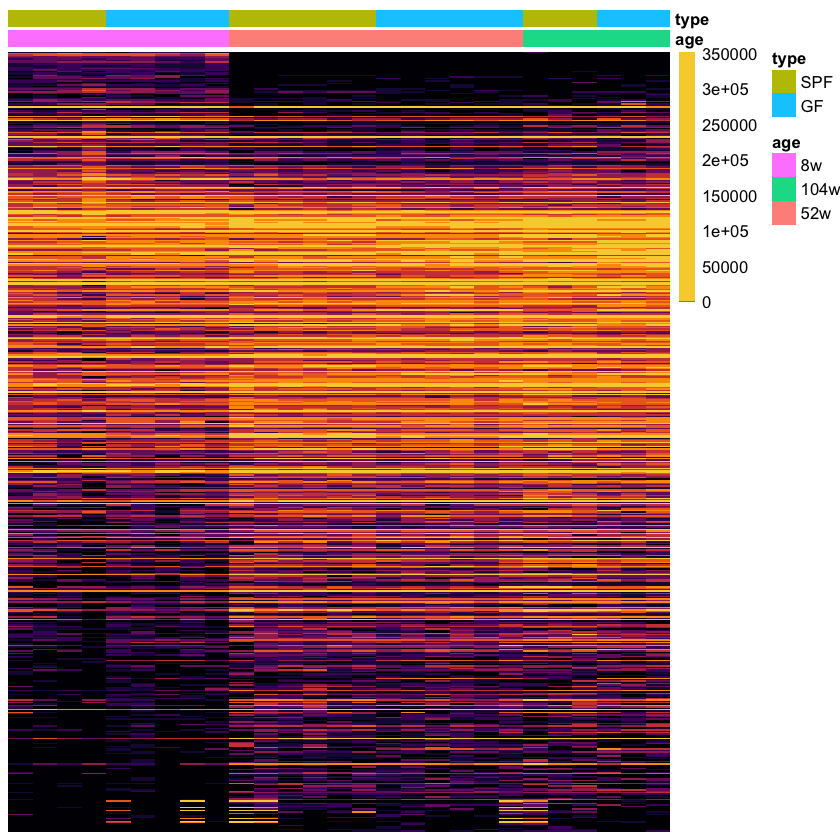

In [34]:
# 52w != 8w or 104w != 8w or 104w != 52w for F with abs(FC) > 2
genes = names((sort(age_gender_deg$fc_deg[which(abs(age_gender_deg$fc_deg[,1])>1 | abs(age_gender_deg$fc_deg[,3])>1 | abs(age_gender_deg$fc_deg[,5])>1),1])))
plot_count_heatmap(genes,F_samples, annot)

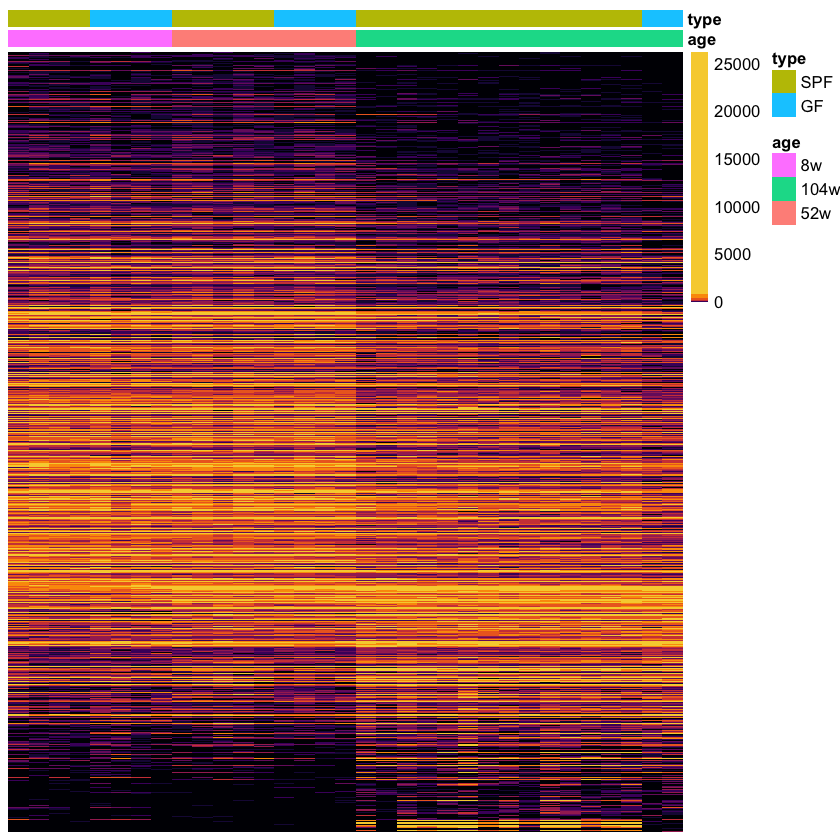

In [35]:
# 52w != 8w or 104w != 8w or 104w != 52w for M with abs(FC) > 2
genes = names((sort(age_gender_deg$fc_deg[which(abs(age_gender_deg$fc_deg[,2])>1 | abs(age_gender_deg$fc_deg[,4])>1 | abs(age_gender_deg$fc_deg[,6])>1),6])))
plot_count_heatmap(genes,M_samples, annot)

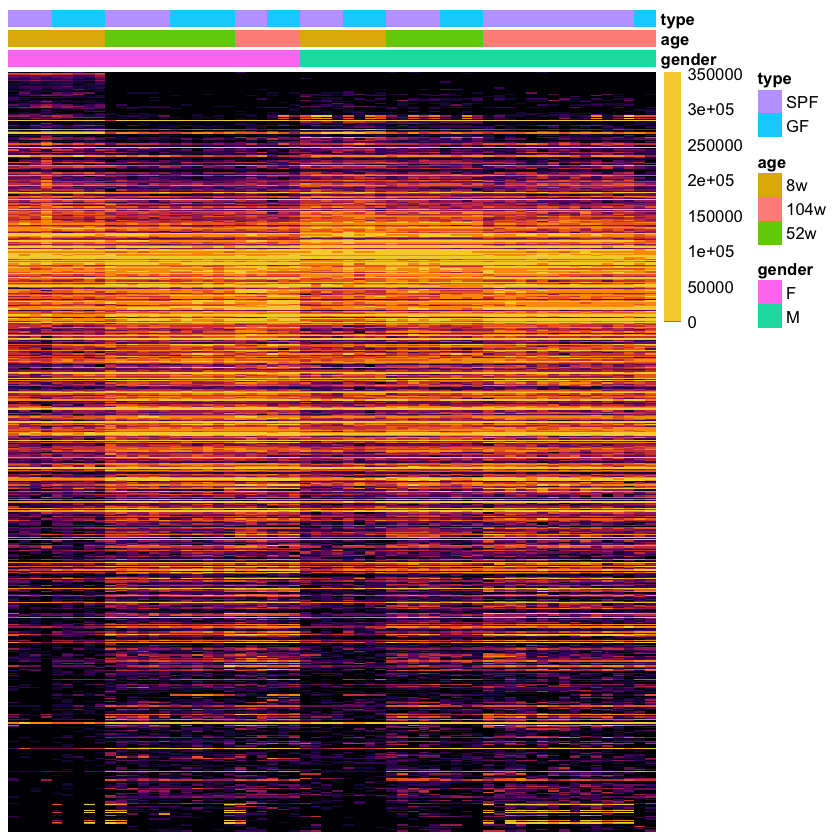

In [36]:
# Genes with 52w != 8w or 104w != 8w or 104w != 52w for M or F and at least one FC > 2
genes = names((sort(age_gender_deg$fc_deg[which(abs(age_gender_deg$fc_deg[,1])>1|abs(age_gender_deg$fc_deg[,2])>1|abs(age_gender_deg$fc_deg[,3])>1|abs(age_gender_deg$fc_deg[,4])>1|abs(age_gender_deg$fc_deg[,5])>1|abs(age_gender_deg$fc_deg[,6])>1),1])))
samples = c(
    'SPF_8w_F_1_2','SPF_8w_F_3_2','SPF_8w_F_4_2','SPF_8w_F_5_2','GF_8w_F_1_2','GF_8w_F_2_2','GF_8w_F_3_2','GF_8w_F_4_2','GF_8w_F_5_2',
    'SPF_52w_F_1_2','SPF_52w_F_2_2','SPF_52w_F_3_2','SPF_52w_F_4_2','SPF_52w_F_5_2','SPF_52w_F_6_2','GF_52w_F_1_2','GF_52w_F_2_2','GF_52w_F_3_2','GF_52w_F_4_2','GF_52w_F_5_2','GF_52w_F_6_2',
    'SPF_104w_F_1_2','SPF_104w_F_2_2','SPF_104w_F_3_2','GF_104w_F_1_2','GF_104w_F_2_2','GF_104w_F_3_2',
    'SPF_8w_M_1_2','SPF_8w_M_2_2','SPF_8w_M_3_2','SPF_8w_M_4_2','GF_8w_M_1_2','GF_8w_M_2_2','GF_8w_M_3_2','GF_8w_M_4_2',
    'SPF_52w_M_1_2','SPF_52w_M_2_2','SPF_52w_M_3_2','SPF_52w_M_4_2','SPF_52w_M_5_2','GF_52w_M_1_2','GF_52w_M_2_2','GF_52w_M_3_2','GF_52w_M_4_2',
    'SPF_104w_M_1_2','SPF_104w_M_2_2','SPF_104w_M_3_2','SPF_104w_M_4_2','SPF_104w_M_5_2','SPF_104w_M_6_2','SPF_104w_M_7_2','SPF_104w_M_8_2','SPF_104w_M_9_2','SPF_104w_M_10_2','SPF_104w_M_11_2','SPF_104w_M_12_2','SPF_104w_M_13_2','SPF_104w_M_14_2','GF_104w_M_1_2','GF_104w_M_2_2')
annot = as.data.frame(colData(dge)[, c("gender", "age", "type")])
plot_count_heatmap(genes,samples, annot)

## Comparison of the numbers per types

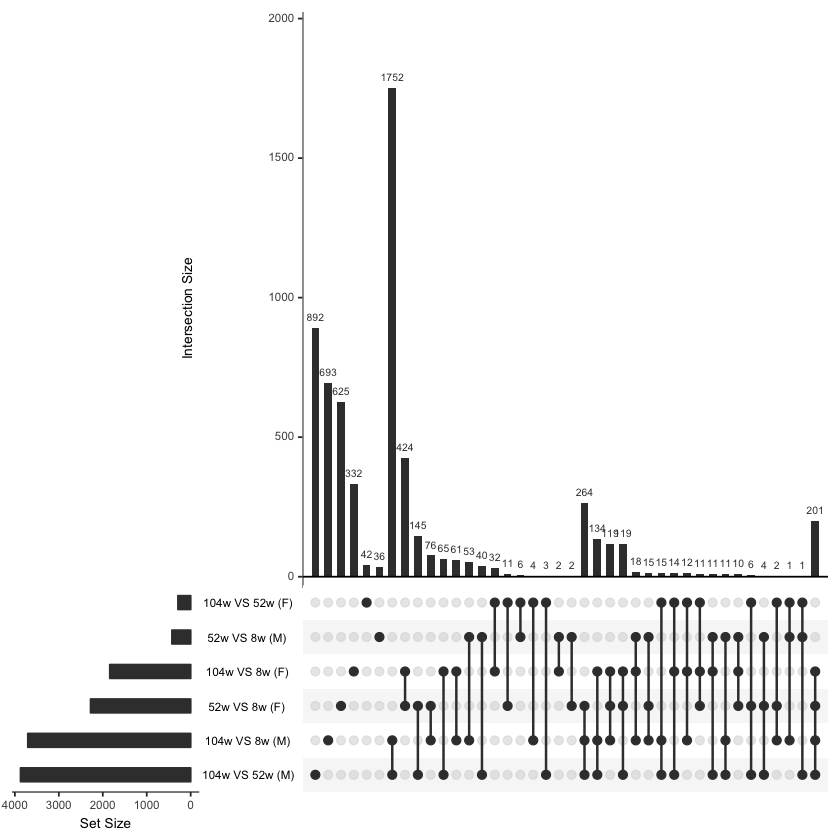

In [222]:
# Differentially expressed genes
upset(as.data.frame(age_gender_deg$deg),nsets = 6)

Some explanation (specially for the gender difference in microglia aging)
![](../doc/images/gender_difference_aging_hist_explanation.png)

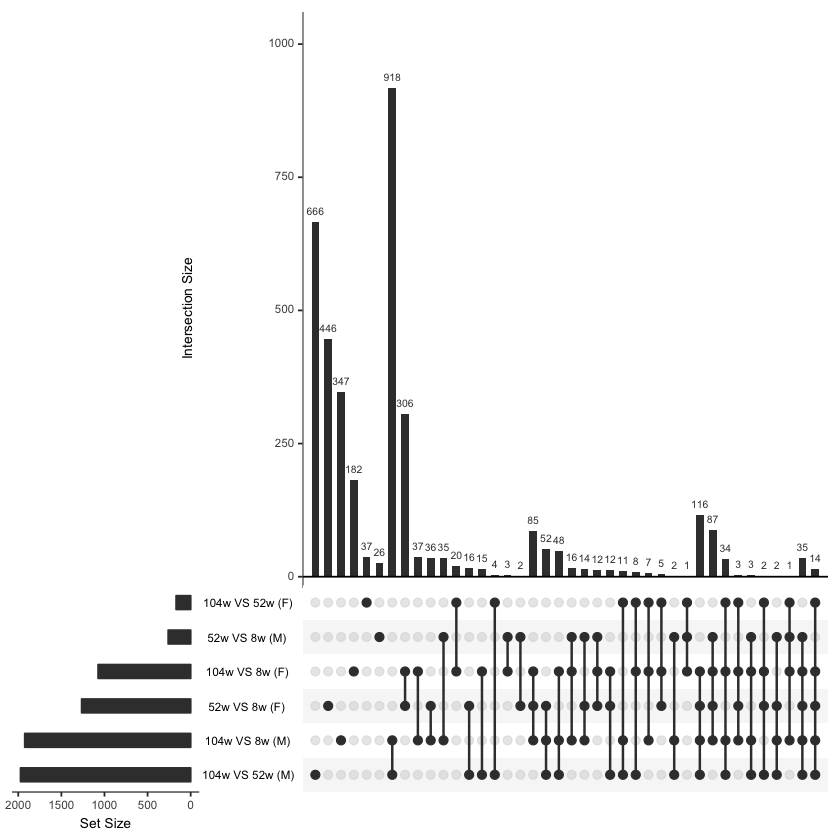

In [70]:
# Differentially more expressed genes
upset(as.data.frame(age_gender_deg$pos),nsets = 6)

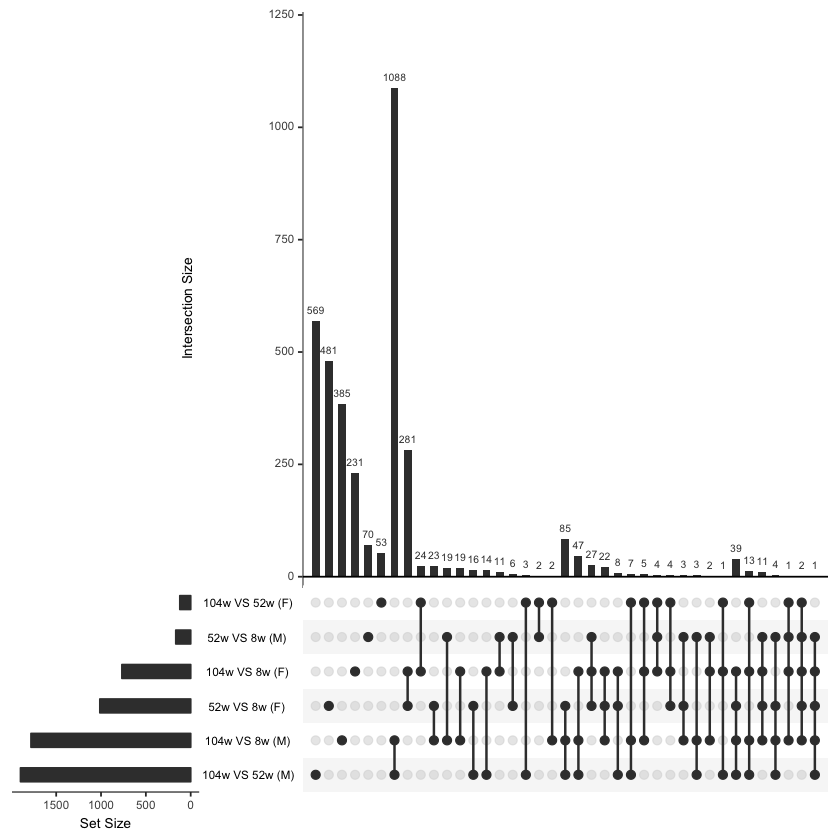

In [71]:
# Differentially less expressed genes
upset(as.data.frame(age_gender_deg$neg),nsets = 6)

## Comparison with the global numbers

### 52w vs 8w

In [72]:
gender_data_52w_8w = list(F_52w_8w, M_52w_8w, global_52w_8w)
names(gender_data_52w_8w) = c("52w VS 8w (F)", "52w VS 8w (M)", "52w VS 8w (global)")
gender_deg_52w_8w = extract_diff_expr_genes(gender_data_52w_8w, "gender_data_52w_8w")

Can't find mm10/geneSymbol length data in genLenDataBase...
Warning message in grep(txdbPattern, installedPackages):
“argument 'pattern' has length > 1 and only the first element will be used”Found the annotaion package, TxDb.Mmusculus.UCSC.mm10.knownGene
Trying to get the gene lengths from it.
Warning message in pcls(G):
“initial point very close to some inequality constraints”Can't find mm10/geneSymbol length data in genLenDataBase...
Warning message in grep(txdbPattern, installedPackages):
“argument 'pattern' has length > 1 and only the first element will be used”Found the annotaion package, TxDb.Mmusculus.UCSC.mm10.knownGene
Trying to get the gene lengths from it.
Warning message in pcls(G):
“initial point very close to some inequality constraints”Can't find mm10/geneSymbol length data in genLenDataBase...
Warning message in grep(txdbPattern, installedPackages):
“argument 'pattern' has length > 1 and only the first element will be used”Found the annotaion package, TxDb.Mmusculus.UC

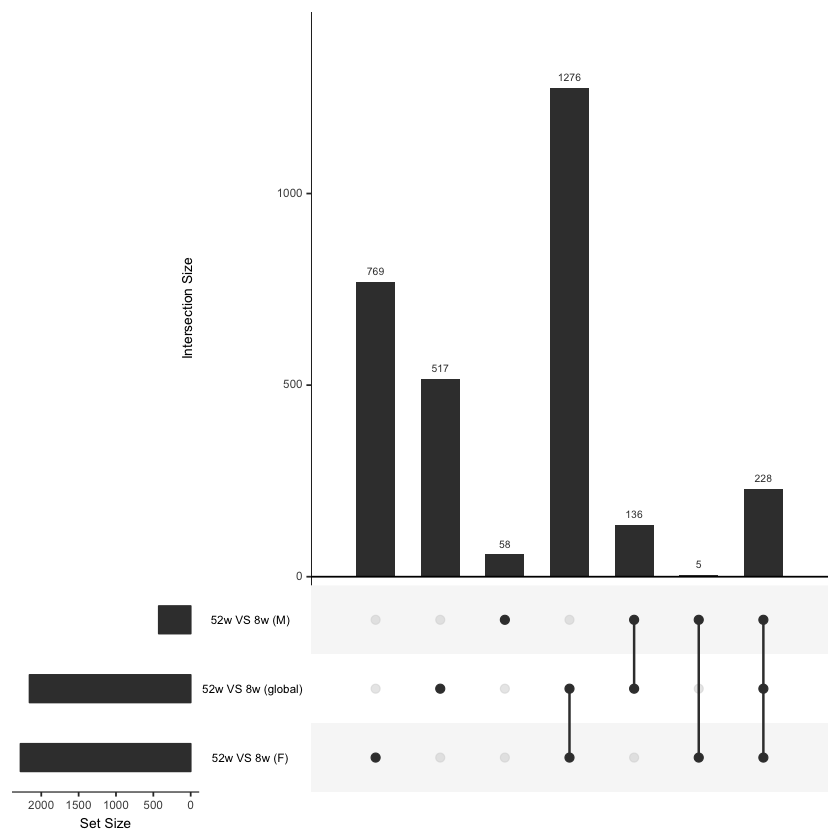

In [73]:
upset(as.data.frame(gender_deg_52w_8w$deg))

### 104w vs 8w

In [74]:
gender_data_104w_8w = list(F_104w_8w, M_104w_8w, global_104w_8w)
names(gender_data_104w_8w) = c("104w VS 8w (F)", "104w VS 8w (M)", "104w VS 8w (global)")
gender_deg_104w_8w = extract_diff_expr_genes(gender_data_104w_8w, "gender_data_104w_8w")

Can't find mm10/geneSymbol length data in genLenDataBase...
Warning message in grep(txdbPattern, installedPackages):
“argument 'pattern' has length > 1 and only the first element will be used”Found the annotaion package, TxDb.Mmusculus.UCSC.mm10.knownGene
Trying to get the gene lengths from it.
Warning message in pcls(G):
“initial point very close to some inequality constraints”Can't find mm10/geneSymbol length data in genLenDataBase...
Warning message in grep(txdbPattern, installedPackages):
“argument 'pattern' has length > 1 and only the first element will be used”Found the annotaion package, TxDb.Mmusculus.UCSC.mm10.knownGene
Trying to get the gene lengths from it.
Warning message in pcls(G):
“initial point very close to some inequality constraints”Can't find mm10/geneSymbol length data in genLenDataBase...
Warning message in grep(txdbPattern, installedPackages):
“argument 'pattern' has length > 1 and only the first element will be used”Found the annotaion package, TxDb.Mmusculus.UC

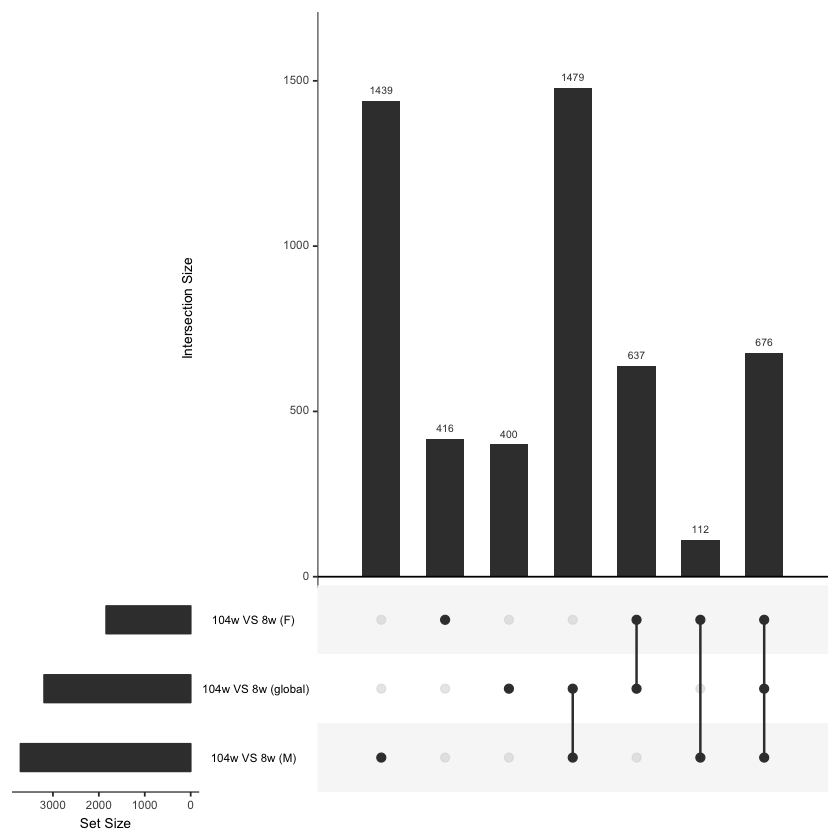

In [75]:
upset(as.data.frame(gender_deg_104w_8w$deg))

In [76]:
genes = names(sort(abs(gender_deg_104w_8w$fc_deg[!is.na(gender_deg_104w_8w$fc_deg[,3]),3]), decreasing = T))[1:100]
gender_deg_104w_8w$fc_deg[genes,]

104w VS 8w (F) 104w VS 8w (M) 104w VS 8w (global)
Ace        28.316850      11.158078      19.737464         
Fam83d     23.177619      13.690420      18.434019         
Fam46b      8.780089      25.935234      17.357661         
Thbd              NA      22.662136      17.313977         
Ptprh     -24.482399      -7.792089     -16.137244         
Lcn2              NA      28.231014      14.125808         
Spx        20.225898             NA      14.068553         
Mpo       -20.664031             NA     -13.285639         
S100a9            NA      25.053228      13.036027         
Cpxm1     -25.013995             NA     -11.844774         
S100a8      8.268813      14.719515      11.494164         
Efna2             NA      18.875486      10.828098         
Fcnb              NA      24.151533       9.279579         
Gprc5c    -18.511190             NA      -9.276583         
Clic6       9.290797       9.102811       9.196804         
Gm19434           NA     -11.943688      -9.085170         
Creb3l4     9.456775       8.513257       8.985016         
Nol4              NA             NA      -8.789062         
Steap1     17.237238             NA       8.650762         
Nwd1       13.331650             NA       8.585411         
Camp        9.219476       6.278933       7.749204         
Car12      16.173890             NA       7.425113         
Tfec       -7.496135      -6.870025      -7.183080         
Slc7a3    -22.097686       7.765446      -7.166120         
Cxcl13      4.380788       9.780436       7.080612         
Acod1       7.247512       5.007514       6.127513         
Dlg5        5.020678       6.815868       5.918273         
Aspm        5.847653       5.691449       5.769551         
Tspan6      5.541402       5.850263       5.695833         
Cspg4       5.621711       5.516614       5.569162         
⋮         ⋮              ⋮              ⋮                  
Flt1       4.362536       4.171683       4.267109          
Dqx1      -4.499066      -4.014940      -4.257003          
Asb4             NA      -6.137639      -4.242135          
Ptpn7            NA       4.885443       4.239239          
Colec12    6.375160             NA       4.230118          
Trpc4            NA       4.594971       4.225972          
Klrb1a           NA       4.579860       4.218375          
Kif23      7.743825             NA       4.216458          
AI593442         NA       4.639972       4.207266          
Gfap       3.023746       5.389154       4.206450          
Ehf              NA       5.880743       4.189053          
Ngp       -5.609540             NA      -4.167946          
Scel             NA      -4.900161      -4.159350          
Itgal      5.104960             NA       4.158340          
Dtl              NA       5.019777       4.135570          
Ifi213     4.003500       4.261856       4.132678          
Slamf7     6.215169             NA       4.124057          
Hist1h1d         NA      -6.644381      -4.116713          
Mndal            NA             NA       4.112854          
Pianp      3.922419       4.255513       4.088966          
Etl4       3.384663       4.764495       4.074579          
Perm1            NA      -4.662096      -4.070928          
Cxcr4      4.067845       4.017569       4.042707          
Hist1h2ad        NA      -6.778885      -4.022706          
Rbp3      -7.730885             NA      -4.008119          
Ifi205           NA       5.720527       3.993424          
H2-Aa      3.245531       4.700606       3.973069          
Ccl8       4.005157       3.854056       3.929606          
Spp1       4.411033       3.423311       3.917172          
Prph2     -7.319575             NA      -3.913176

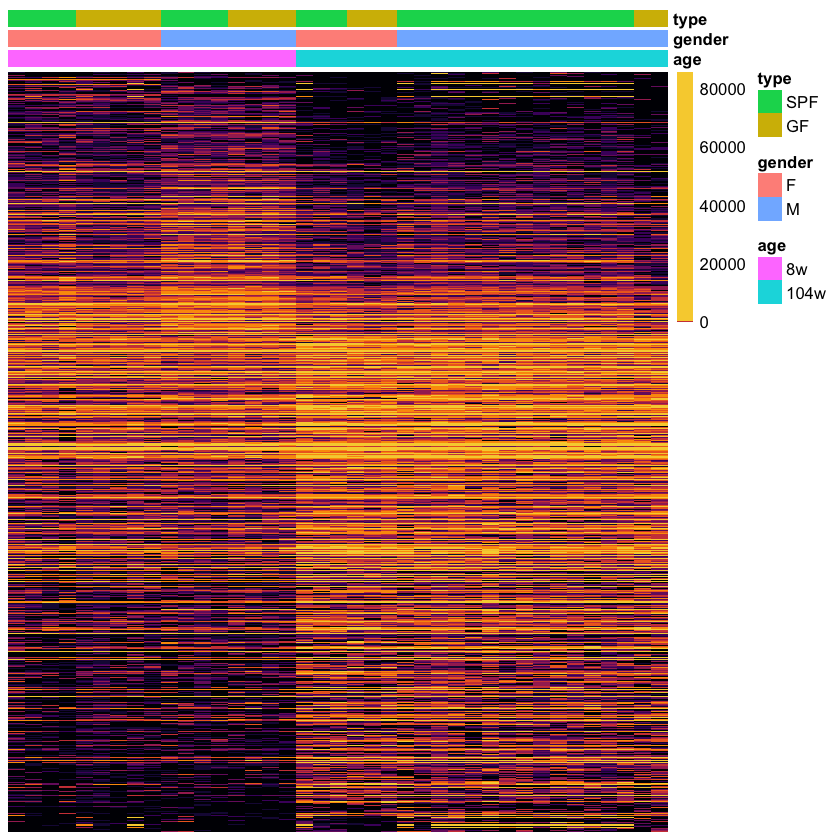

In [77]:
samples = c(
    'SPF_8w_F_1_2','SPF_8w_F_3_2','SPF_8w_F_4_2','SPF_8w_F_5_2','GF_8w_F_1_2','GF_8w_F_2_2','GF_8w_F_3_2','GF_8w_F_4_2','GF_8w_F_5_2','SPF_8w_M_1_2','SPF_8w_M_2_2','SPF_8w_M_3_2','SPF_8w_M_4_2','GF_8w_M_1_2','GF_8w_M_2_2','GF_8w_M_3_2','GF_8w_M_4_2',
    'SPF_104w_F_1_2','SPF_104w_F_2_2','SPF_104w_F_3_2','GF_104w_F_1_2','GF_104w_F_2_2','GF_104w_F_3_2','SPF_104w_M_1_2','SPF_104w_M_2_2','SPF_104w_M_3_2','SPF_104w_M_4_2','SPF_104w_M_5_2','SPF_104w_M_6_2','SPF_104w_M_7_2','SPF_104w_M_8_2','SPF_104w_M_9_2','SPF_104w_M_10_2','SPF_104w_M_11_2','SPF_104w_M_12_2','SPF_104w_M_13_2','SPF_104w_M_14_2','GF_104w_M_1_2','GF_104w_M_2_2')
annot = as.data.frame(colData(dge)[, c("age", "gender", "type")])
genes = names((sort(gender_deg_104w_8w$fc_deg[which(abs(gender_deg_104w_8w$fc_deg[,3])>1),3])))
plot_count_heatmap(genes,samples, annot)

### 104w vs 52w

In [78]:
gender_data_104w_52w = list(F_104w_52w, M_104w_52w, global_104w_52w)
names(gender_data_104w_52w) = c("104w VS 52w (F)", "104w VS 52w (M)", "104w VS 52w (global)")
gender_deg_104w_52w = extract_diff_expr_genes(gender_data_104w_52w, "gender_data_104w_52w")

Can't find mm10/geneSymbol length data in genLenDataBase...
Warning message in grep(txdbPattern, installedPackages):
“argument 'pattern' has length > 1 and only the first element will be used”Found the annotaion package, TxDb.Mmusculus.UCSC.mm10.knownGene
Trying to get the gene lengths from it.
Warning message in pcls(G):
“initial point very close to some inequality constraints”Can't find mm10/geneSymbol length data in genLenDataBase...
Warning message in grep(txdbPattern, installedPackages):
“argument 'pattern' has length > 1 and only the first element will be used”Found the annotaion package, TxDb.Mmusculus.UCSC.mm10.knownGene
Trying to get the gene lengths from it.
Warning message in pcls(G):
“initial point very close to some inequality constraints”Can't find mm10/geneSymbol length data in genLenDataBase...
Warning message in grep(txdbPattern, installedPackages):
“argument 'pattern' has length > 1 and only the first element will be used”Found the annotaion package, TxDb.Mmusculus.UC

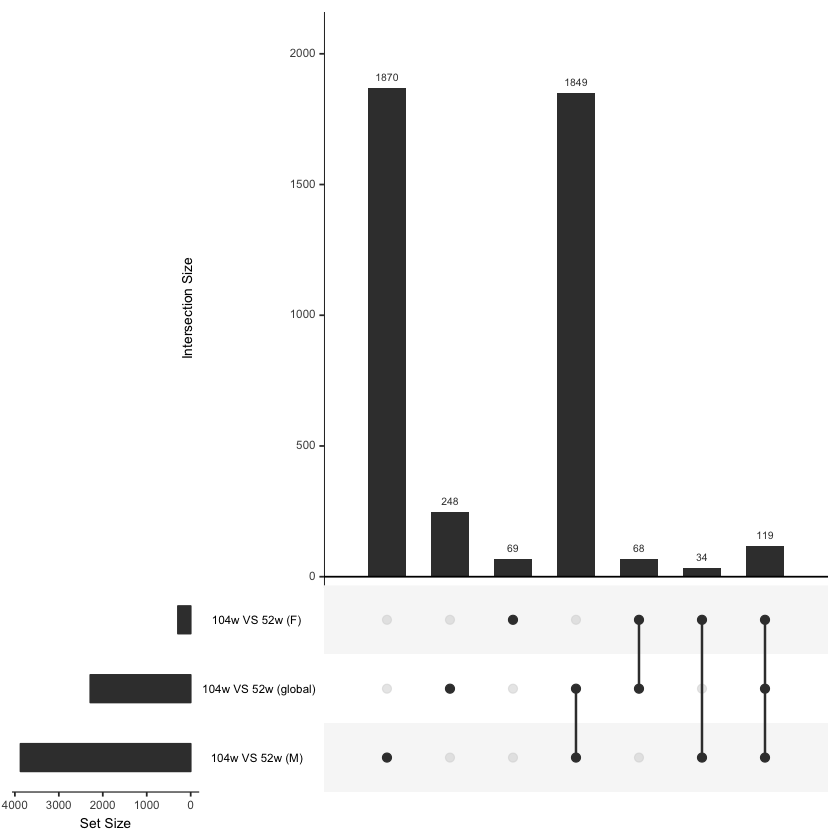

In [79]:
upset(as.data.frame(gender_deg_104w_52w$deg))

In [80]:
genes = names(sort(abs(gender_deg_104w_52w$fc_deg[!is.na(gender_deg_104w_52w$fc_deg[,3]),3]), decreasing = T))[1:100]
gender_deg_104w_52w$fc_deg[genes,]

104w VS 52w (F) 104w VS 52w (M) 104w VS 52w (global)
Mpo           -32.466502             NA       -19.300843          
Zdbf2                 NA      25.806077        18.623117          
Ptprh         -24.701392      -7.764654       -16.233023          
Lcn2           -9.443309      40.863914        15.710302          
Mgarp          22.641027       7.656353        15.148690          
Gprc5c        -19.029731             NA        -9.887987          
Cpxm1         -30.156721      11.222933        -9.466894          
Slc7a3        -24.528575       7.809724        -8.359426          
Hp            -17.408351             NA        -6.608719          
Colec12               NA       7.644700         5.792738          
Cd163                 NA       8.597315         5.747360          
Trpc4           5.634561       4.654521         5.144541          
Myof                  NA       6.178011         5.032183          
Cd177         -12.633059      22.681278         5.024109          
Fcnb          -13.346335             NA        -4.689992          
Lyve1                 NA       6.277093         4.657326          
Gabrq                 NA       8.386822         4.653328          
Ngp           -12.166856             NA        -4.578808          
Tmem51                NA             NA         4.485433          
Klrb1a                NA             NA         4.331843          
Cacnb3                NA             NA        -4.331486          
Etl4                  NA       5.440361         4.231621          
Vnn3                  NA             NA         4.196021          
Slc4a4                NA             NA        -4.109942          
Cd38                  NA       5.989201         4.060415          
Ccl8                  NA       6.991850         4.042293          
Ociad2         -5.666878             NA        -4.016859          
Ermn                  NA             NA        -3.973427          
Perm1                 NA             NA        -3.702784          
Emilin2               NA       4.512721         3.691419          
⋮             ⋮               ⋮               ⋮                   
Gpx3           2.918923        2.627645        2.773284           
Dnase1l2             NA       -2.635453       -2.758708           
Mmp12          2.961412        2.542841        2.752127           
Ccr9                 NA              NA       -2.711297           
Il1rn                NA        3.308367        2.707633           
Runx3                NA              NA        2.694542           
Igf2r                NA        3.472564        2.679905           
Ms4a7                NA        3.759291        2.672158           
Adamts4              NA              NA       -2.669079           
Efhd1                NA              NA       -2.661411           
Tbc1d2               NA       -3.389780       -2.657572           
Zfp786               NA       -3.811090       -2.639888           
Gas7                 NA        4.123348        2.634732           
Guca1b               NA       -3.288956       -2.587378           
C3                   NA        3.403919        2.583153           
Cxcl13               NA        4.248634        2.555157           
Sh3pxd2b             NA        2.654750        2.554039           
Slc1a2               NA              NA       -2.552760           
Hist1h3a             NA       -4.952422       -2.544987           
Snord47              NA       -3.993222       -2.506268           
Olfr99               NA       -3.778552       -2.490215           
Tfec          -4.028360              NA       -2.487742           
Alb                  NA              NA       -2.471989           
Flt1           2.713159        2.225854        2.469506           
Pianp          2.598864        2.303987        2.451425           
5033403F01Rik        NA              NA       -2.449571           
Gper1         -4.757286              NA       -2.425611           
Ttc26                NA              NA       -2.404059      

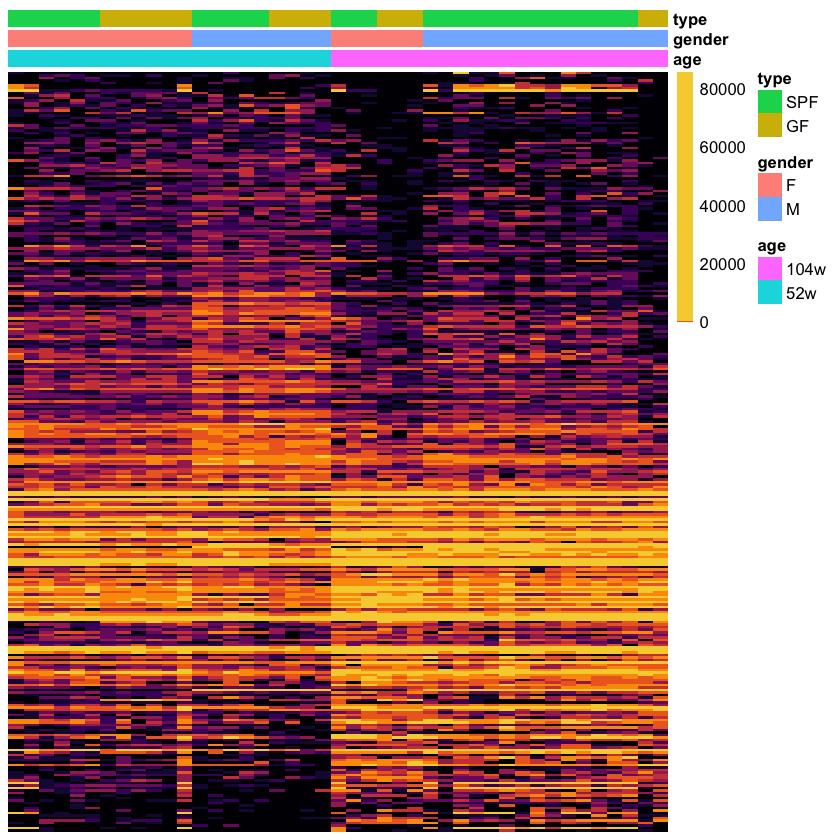

In [81]:
samples = c(
    'SPF_52w_F_1_2','SPF_52w_F_2_2','SPF_52w_F_3_2','SPF_52w_F_4_2','SPF_52w_F_5_2','SPF_52w_F_6_2','GF_52w_F_1_2','GF_52w_F_2_2','GF_52w_F_3_2','GF_52w_F_4_2','GF_52w_F_5_2','GF_52w_F_6_2','SPF_52w_M_1_2','SPF_52w_M_2_2','SPF_52w_M_3_2','SPF_52w_M_4_2','SPF_52w_M_5_2','GF_52w_M_1_2','GF_52w_M_2_2','GF_52w_M_3_2','GF_52w_M_4_2',
    'SPF_104w_F_1_2','SPF_104w_F_2_2','SPF_104w_F_3_2','GF_104w_F_1_2','GF_104w_F_2_2','GF_104w_F_3_2','SPF_104w_M_1_2','SPF_104w_M_2_2','SPF_104w_M_3_2','SPF_104w_M_4_2','SPF_104w_M_5_2','SPF_104w_M_6_2','SPF_104w_M_7_2','SPF_104w_M_8_2','SPF_104w_M_9_2','SPF_104w_M_10_2','SPF_104w_M_11_2','SPF_104w_M_12_2','SPF_104w_M_13_2','SPF_104w_M_14_2','GF_104w_M_1_2','GF_104w_M_2_2')
annot = as.data.frame(colData(dge)[, c("age", "gender", "type")])
genes = names((sort(gender_deg_104w_52w$fc_deg[which(abs(gender_deg_104w_52w$fc_deg[,3])>1),3])))
plot_count_heatmap(genes,samples, annot)

## Gender differences in aging

Question: Is there differences in aging between gender? Is there really a delay for some genes in male?

| 52w vs 8w for F | 52w vs 8w for M | 104w vs 52w for F | 104w vs 52w for M | Gene number
--- | --- | --- | --- | --- | ---
Set 1 | != | == | == | != | 729
Set 2 | == | != | != | == | 9

Gene number
Set 1 729        
Set 2   9

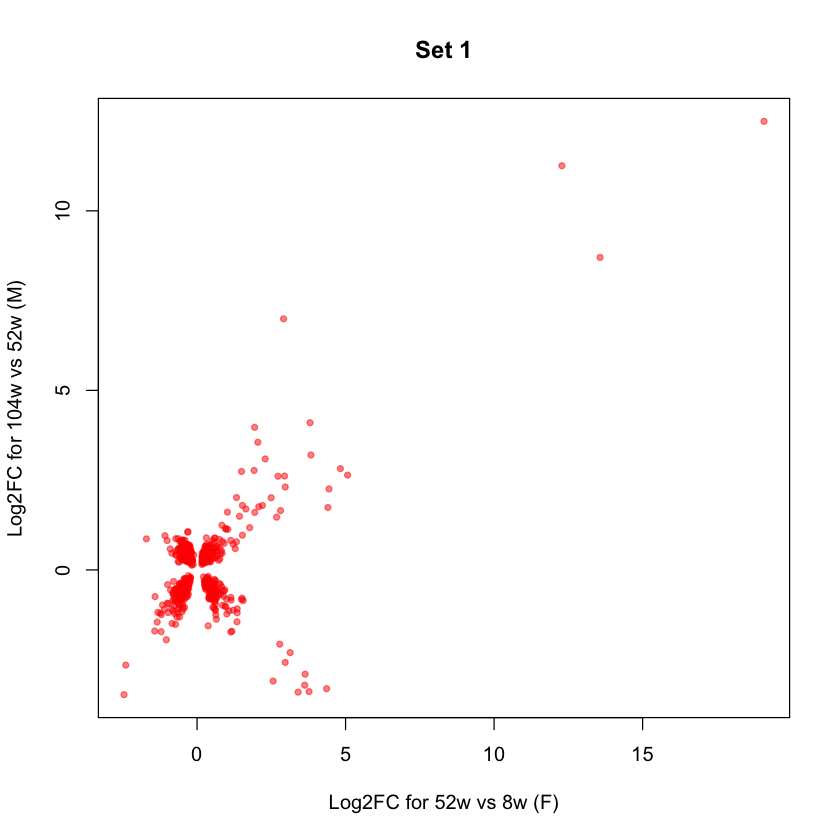

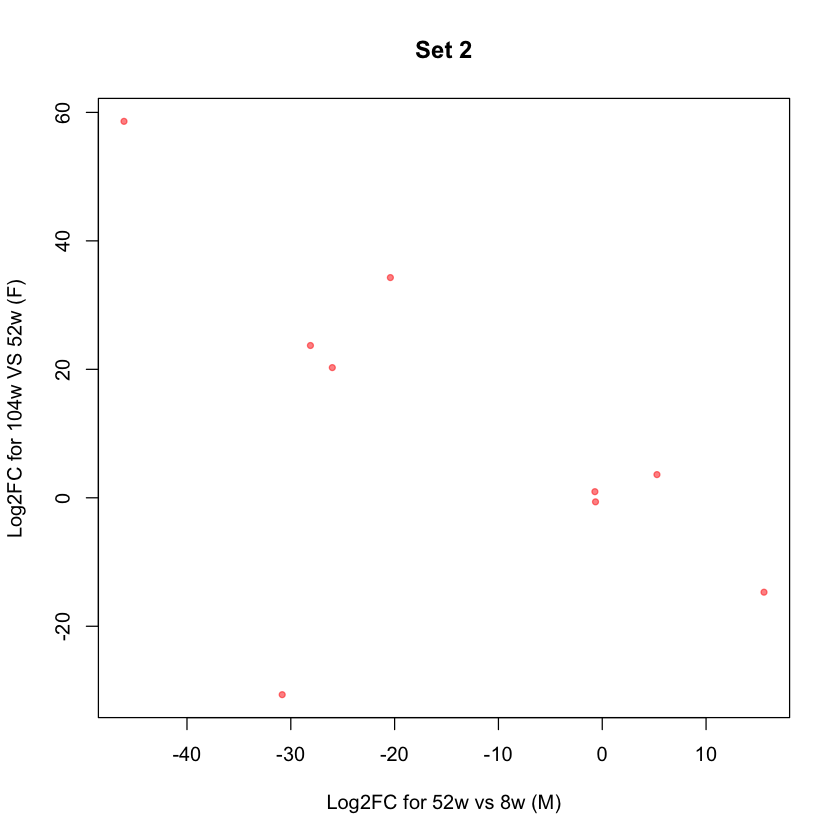

In [113]:
# set extractions
set1 = rownames(age_gender_deg$fc_deg[!is.na(age_gender_deg$fc_deg[,1]) & is.na(age_gender_deg$fc_deg[,2]) & is.na(age_gender_deg$fc_deg[,5]) & !is.na(age_gender_deg$fc_deg[,6]),])
set2 = rownames(age_gender_deg$fc_deg[is.na(age_gender_deg$fc_deg[,1]) & !is.na(age_gender_deg$fc_deg[,2]) & !is.na(age_gender_deg$fc_deg[,5]) & is.na(age_gender_deg$fc_deg[,6]),])
# gene numbers
res = matrix(0,ncol = 1, nrow=2, dimnames=list(c("Set 1", "Set 2"),c("Gene number")))
res[1,1] = length(set1)
res[2,1] = length(set2)
res
# log2FC
set1_fc = age_gender_deg$fc_deg[set1,]
set1_fc[is.na(set1_fc)] = 0
set2_fc = age_gender_deg$fc_deg[set2,]
set2_fc[is.na(set2_fc)] = 0
# plots of the differences
plot(set1_fc[,"52w VS 8w (F)"], set1_fc[,"104w VS 52w (M)"], main="Set 1", xlab = "Log2FC for 52w vs 8w (F)", ylab= "Log2FC for 104w vs 52w (M)", pch = 20, col = rgb(1,0,0,alpha=0.5))
plot(set2_fc[,"52w VS 8w (M)"], set2_fc[,"104w VS 52w (F)"], main="Set 2", xlab = "Log2FC for 52w vs 8w (M)", ylab= "Log2FC for 104w VS 52w (F)", pch = 20, col = rgb(1,0,0,alpha=0.5))

In [105]:
investigate_enrichement = function(set, all_genes){
    deg = 1*(all_genes %in% set)
    names(deg) = all_genes
    pwf = nullp(deg, 'mm10', 'geneSymbol', plot.fit=F)
    res = matrix(0,nrow=2,ncol=2, dimnames=list(c("over", "under"),c("GO","KEGG")))
    # GO
    GO_wall = goseq(pwf,'mm10', 'geneSymbol')
    over_represented_GO = GO_wall[GO_wall$over_represented_pvalue < 0.05,c("category","term","ontology")]
    under_represented_GO = GO_wall[GO_wall$under_represented_pvalue < 0.05,c("category","term","ontology")]
    res[1,1] = dim(over_represented_GO)[1]
    res[2,1] = dim(under_represented_GO)[1]
    # plot ontology barplot
    GO_ontology_counts = merge(count(over_represented_GO, var="ontology"), count(under_represented_GO, var="ontology"), by="ontology")
    rownames(GO_ontology_counts) = GO_ontology_counts[,1]
    GO_ontology_counts = GO_ontology_counts[,-1]
    colnames(GO_ontology_counts) = c("over_represented_GO", "under_represented_GO")
    GO_ontology_counts = as.matrix(GO_ontology_counts)
    barplot(t(GO_ontology_counts), beside = TRUE, col=c("green4", "red4"))
    legend("topright", c("over", "under"), fill=c("green4", "red4"))
    # KEGG pathways
    KEGG_wall = goseq(pwf,'mm10', 'geneSymbol', test.cats="KEGG")
    over_represented_KEGG = KEGG_wall[KEGG_wall$over_represented_pvalue < 0.05,]
    under_represented_KEGG = KEGG_wall[KEGG_wall$under_represented_pvalue < 0.05,]
    res[1,2] = dim(over_represented_KEGG)[1]
    res[2,2] = dim(under_represented_KEGG)[1]
    print(res)
}
investigate_gene_set = function(mat){
    print(dim(mat)[1])
    print(cor.test(mat[,1],mat[,2]))     
}

### Genes with differential expression delayed in male

Genes (set 1):
- Differentially expressed between 52w and 8w in F
- Not differentially expressed between 104w and 52w in F
- Not differentially expressed between 52w and 8w in M
- Differentially expressed between 104w and 52w in M
- No criteria for 104w vs 8w in both F and M

![](../doc/images/male_delayed_gene_analysis_explanation.png)

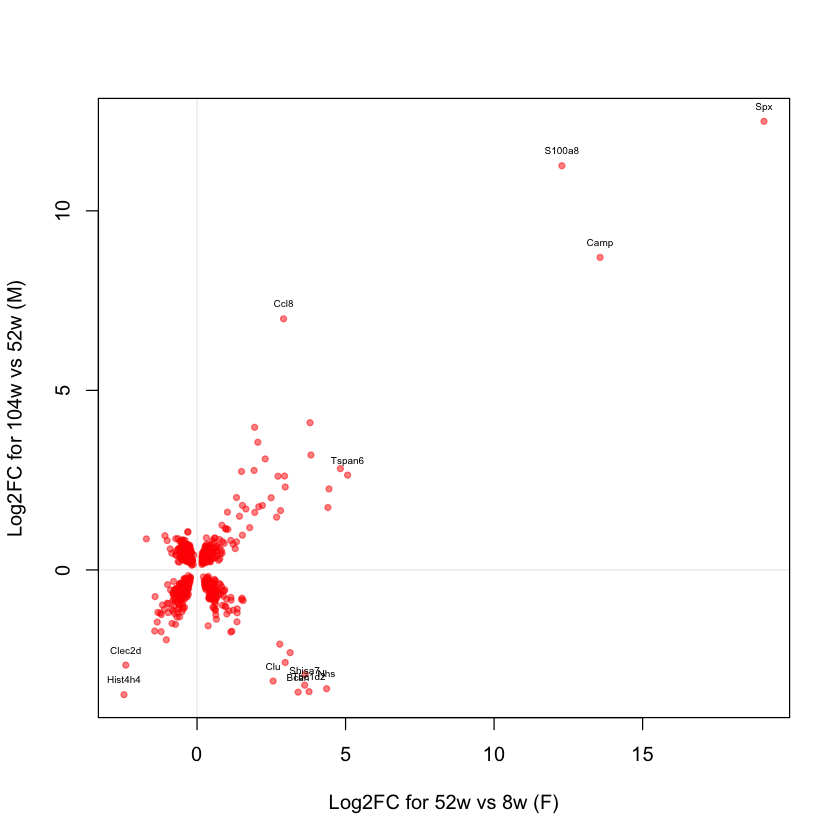

In [50]:
# How the genes changed in the first phase (between 8w and 52w) in Female change in the second phase (between 52w and 104w) for the Male
aging_gender_diff = cbind(set1_fc[,"52w VS 8w (F)"], set1_fc[,"104w VS 52w (M)"])
colnames(aging_gender_diff) = c("52w VS 8w (F)","104w VS 52w (M)")
lim = c(min(aging_gender_diff), max(aging_gender_diff))
plot(aging_gender_diff, xlab = "Log2FC for 52w vs 8w (F)", ylab= "Log2FC for 104w vs 52w (M)", pch = 20, col = rgb(1,0,0,alpha=0.5))
abline(h = 0, col = rgb(0,0,0,alpha=0.1))
abline(v = 0, col = rgb(0,0,0,alpha=0.1))
# extract extreme genes
extr = aging_gender_diff[aging_gender_diff[,1]>5 | aging_gender_diff[,1]<(-2) | aging_gender_diff[,2]>5 | aging_gender_diff[,2]<(-3),]
text(extr[,1],extr[,2], labels = rownames(extr), pos=3, cex=0.5)

Can't find mm10/geneSymbol length data in genLenDataBase...
Warning message in grep(txdbPattern, installedPackages):
“argument 'pattern' has length > 1 and only the first element will be used”Found the annotaion package, TxDb.Mmusculus.UCSC.mm10.knownGene
Trying to get the gene lengths from it.
Fetching GO annotations...
For 195 genes, we could not find any categories. These genes will be excluded.
To force their use, please run with use_genes_without_cat=TRUE (see documentation).
This was the default behavior for version 1.15.1 and earlier.
Calculating the p-values...
'select()' returned 1:1 mapping between keys and columns
Fetching GO annotations...
For 4389 genes, we could not find any categories. These genes will be excluded.
To force their use, please run with use_genes_without_cat=TRUE (see documentation).
This was the default behavior for version 1.15.1 and earlier.
Calculating the p-values...


       GO KEGG
over  345   12
under 152    7


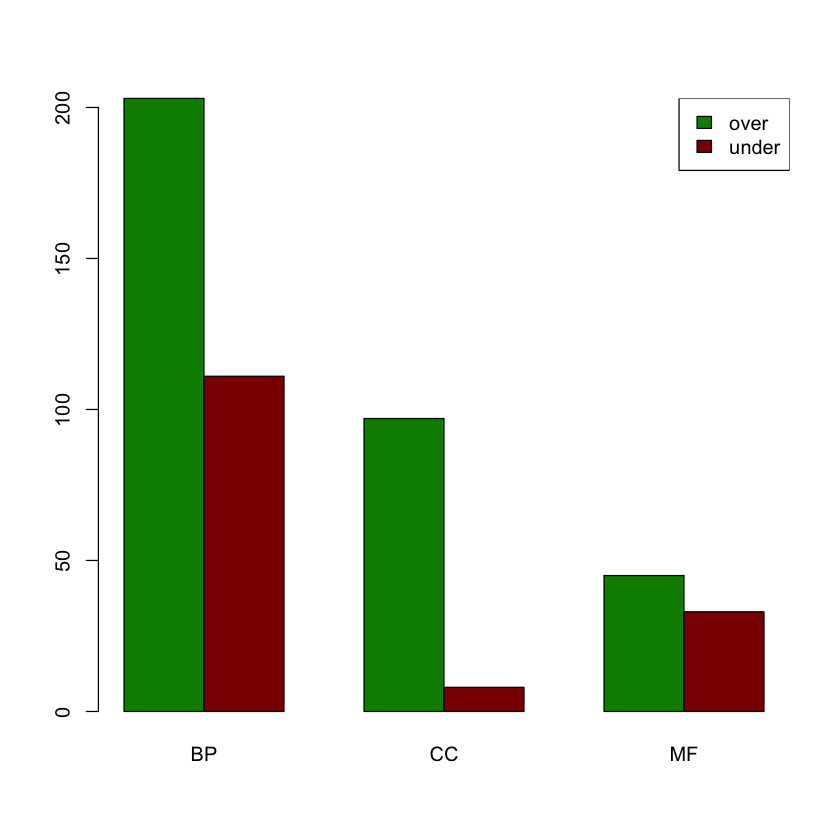

In [100]:
investigate_enrichement(rownames(aging_gender_diff),rownames(age_gender_deg$deg))

In [101]:
# 52w VS 8w (F) > 0 and 104w VS 52w (M) > 0
F_pos_M_pos_set_1 = aging_gender_diff[aging_gender_diff[,"52w VS 8w (F)"]>0 & aging_gender_diff[,"104w VS 52w (M)"]>0,]
investigate_gene_set(F_pos_M_pos_set_1)
#investigate_enrichement(rownames(F_pos_M_pos_set_1),rownames(age_gender_deg$deg))

[1] 186

	Pearson's product-moment correlation

data:  mat[, 1] and mat[, 2]
t = 34.483, df = 184, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.9083259 0.9475915
sample estimates:
      cor 
0.9305874 



In [102]:
# 52w VS 8w (F) > 0 and 104w VS 52w (M) < 0
F_pos_M_neg_set_1 = aging_gender_diff[aging_gender_diff[,"52w VS 8w (F)"]>0 & aging_gender_diff[,"104w VS 52w (M)"]<0,]
investigate_gene_set(F_pos_M_neg_set_1)
#investigate_enrichement(rownames(F_pos_M_neg_set_1),rownames(age_gender_deg$deg))


[1] 136

	Pearson's product-moment correlation

data:  mat[, 1] and mat[, 2]
t = -26.39, df = 134, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.9393075 -0.8836611
sample estimates:
       cor 
-0.9157734 



In [103]:
# 52w VS 8w (F) < 0 and 104w VS 52w (M) > 0
F_neg_M_pos_set_1 = aging_gender_diff[aging_gender_diff[,"52w VS 8w (F)"]<0 & aging_gender_diff[,"104w VS 52w (M)"]>0,]
investigate_gene_set(F_neg_M_pos_set_1)
#investigate_enrichement(rownames(F_neg_M_pos_set_1),rownames(age_gender_deg$deg))

[1] 267

	Pearson's product-moment correlation

data:  mat[, 1] and mat[, 2]
t = -8.3658, df = 265, p-value = 3.45e-15
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.5471083 -0.3566042
sample estimates:
       cor 
-0.4570828 



In [104]:
# 52w VS 8w (F) < 0 and 104w VS 52w (M) < 0
F_neg_M_neg_set_1 = aging_gender_diff[aging_gender_diff[,"52w VS 8w (F)"]<0 & aging_gender_diff[,"104w VS 52w (M)"]<0,]
investigate_gene_set(F_neg_M_neg_set_1)
#investigate_enrichement(rownames(F_neg_M_neg_set_1),rownames(age_gender_deg$deg))

[1] 140

	Pearson's product-moment correlation

data:  mat[, 1] and mat[, 2]
t = 16.17, df = 138, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.7428457 0.8595714
sample estimates:
      cor 
0.8090422 



![](../results/dge/img/male_delayed_genes.png)

### Genes with differential expression delayed in female

Genes (set 2):
- Not differentially expressed between 52w and 8w in F
- Differentially expressed between 104w and 52w in F
- Differentially expressed between 52w and 8w in M
- Not differentially expressed between 104w and 52w in M
- No criteria for 104w vs 8w in both F and M

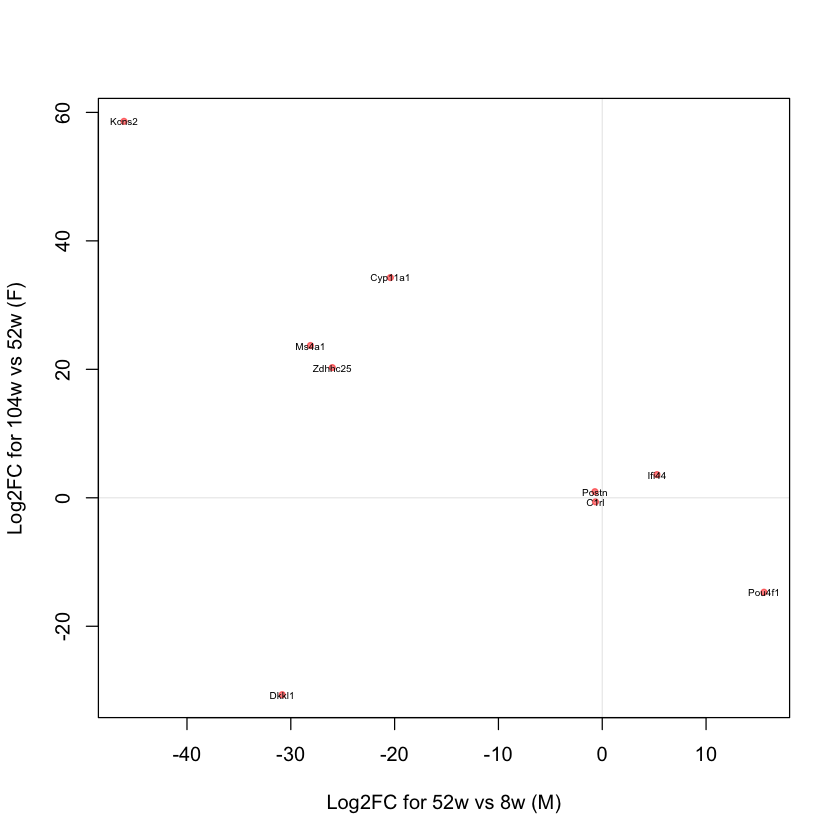

In [108]:
# How the genes changed in the first phase (between 8w and 52w) in Male change in the second phase (between 52w and 104w) for the Female
aging_gender_diff = cbind(set2_fc[,"52w VS 8w (M)"], set2_fc[,"104w VS 52w (F)"])
colnames(aging_gender_diff) = c("52w VS 8w (M)","104w VS 52w (F)")
lim = c(min(aging_gender_diff), max(aging_gender_diff))
plot(aging_gender_diff, xlab = "Log2FC for 52w vs 8w (M)", ylab= "Log2FC for 104w vs 52w (F)", pch = 20, col = rgb(1,0,0,alpha=0.5))
abline(h = 0, col = rgb(0,0,0,alpha=0.1))
abline(v = 0, col = rgb(0,0,0,alpha=0.1))
# extract extreme genes
#extr = aging_gender_diff[aging_gender_diff[,1]>5 | aging_gender_diff[,1]<(-2) | aging_gender_diff[,2]>5 | aging_gender_diff[,2]<(-3),]
text(aging_gender_diff[,1],aging_gender_diff[,2], labels = rownames(aging_gender_diff), cex=0.5)

# Comparison between the ages for the genders and types

Questions
- What are the differences between the ages for the different combinations of gender and types?
- Do we observe the same changes as globally?

In [82]:
age_type_gender_data = list(F_SPF_52w_8w, F_GF_52w_8w, M_SPF_52w_8w, M_GF_52w_8w,F_SPF_104w_8w,F_GF_104w_8w,M_SPF_104w_8w,M_GF_104w_8w,F_SPF_104w_52w,F_GF_104w_52w,M_SPF_104w_52w,M_GF_104w_52w)
names(age_type_gender_data) = c("52w VS 8w (F, SPF)", "52w VS 8w (F, GF)", "52w VS 8w (M, SPF)", "52w VS 8w (M, GF)", "104w VS 8w (F, SPF)", "104w VS 8w (F, GF)", "104w VS 8w (M, SPF)", "104w VS 8w (M, GF)","104w VS 52w (F, SPF)", "104w VS 52w (F, GF)","104w VS 52w (M, SPF)", "104w VS 52w (M, GF)")
age_type_gender_deg = extract_diff_expr_genes(age_type_gender_data, "age_type_gender_data")

Can't find mm10/geneSymbol length data in genLenDataBase...
Warning message in grep(txdbPattern, installedPackages):
“argument 'pattern' has length > 1 and only the first element will be used”Found the annotaion package, TxDb.Mmusculus.UCSC.mm10.knownGene
Trying to get the gene lengths from it.
Warning message in pcls(G):
“initial point very close to some inequality constraints”Can't find mm10/geneSymbol length data in genLenDataBase...
Warning message in grep(txdbPattern, installedPackages):
“argument 'pattern' has length > 1 and only the first element will be used”Found the annotaion package, TxDb.Mmusculus.UCSC.mm10.knownGene
Trying to get the gene lengths from it.
Warning message in pcls(G):
“initial point very close to some inequality constraints”Can't find mm10/geneSymbol length data in genLenDataBase...
Warning message in grep(txdbPattern, installedPackages):
“argument 'pattern' has length > 1 and only the first element will be used”Found the annotaion package, TxDb.Mmusculus.UC

Calculating the p-values...
'select()' returned 1:1 mapping between keys and columns
Fetching GO annotations...
For 2874 genes, we could not find any categories. These genes will be excluded.
To force their use, please run with use_genes_without_cat=TRUE (see documentation).
This was the default behavior for version 1.15.1 and earlier.
Calculating the p-values...
'select()' returned 1:1 mapping between keys and columns
Fetching GO annotations...
For 17944 genes, we could not find any categories. These genes will be excluded.
To force their use, please run with use_genes_without_cat=TRUE (see documentation).
This was the default behavior for version 1.15.1 and earlier.
Calculating the p-values...
Fetching GO annotations...
For 17944 genes, we could not find any categories. These genes will be excluded.
To force their use, please run with use_genes_without_cat=TRUE (see documentation).
This was the default behavior for version 1.15.1 and earlier.
Calculating the p-values...
Fetching GO a

## Comparison of the numbers per types

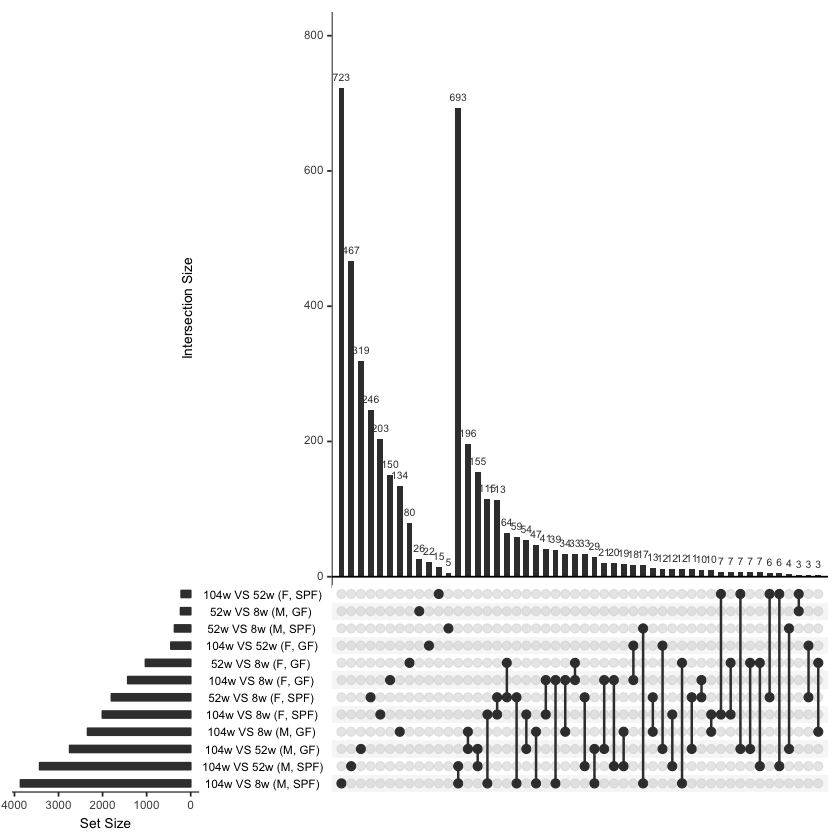

In [83]:
upset(as.data.frame(age_type_gender_deg$deg), nsets = 12, nintersects=50)

## Comparison with the global numbers

### 52w vs 8w

In [84]:
gender_type_data_52w_8w = list(F_SPF_52w_8w, F_GF_52w_8w, M_SPF_52w_8w, M_GF_52w_8w, global_52w_8w)
names(gender_type_data_52w_8w) = c("52w VS 8w (F, SPF)", "52w VS 8w (F, GF)", "52w VS 8w (M, SPF)", "52w VS 8w (M, GF)", "52w VS 8w (global)")
gender_type_deg_52w_8w = extract_diff_expr_genes(gender_type_data_52w_8w, "gender_type_data_52w_8w")

Can't find mm10/geneSymbol length data in genLenDataBase...
Warning message in grep(txdbPattern, installedPackages):
“argument 'pattern' has length > 1 and only the first element will be used”Found the annotaion package, TxDb.Mmusculus.UCSC.mm10.knownGene
Trying to get the gene lengths from it.
Warning message in pcls(G):
“initial point very close to some inequality constraints”Can't find mm10/geneSymbol length data in genLenDataBase...
Warning message in grep(txdbPattern, installedPackages):
“argument 'pattern' has length > 1 and only the first element will be used”Found the annotaion package, TxDb.Mmusculus.UCSC.mm10.knownGene
Trying to get the gene lengths from it.
Warning message in pcls(G):
“initial point very close to some inequality constraints”Can't find mm10/geneSymbol length data in genLenDataBase...
Warning message in grep(txdbPattern, installedPackages):
“argument 'pattern' has length > 1 and only the first element will be used”Found the annotaion package, TxDb.Mmusculus.UC

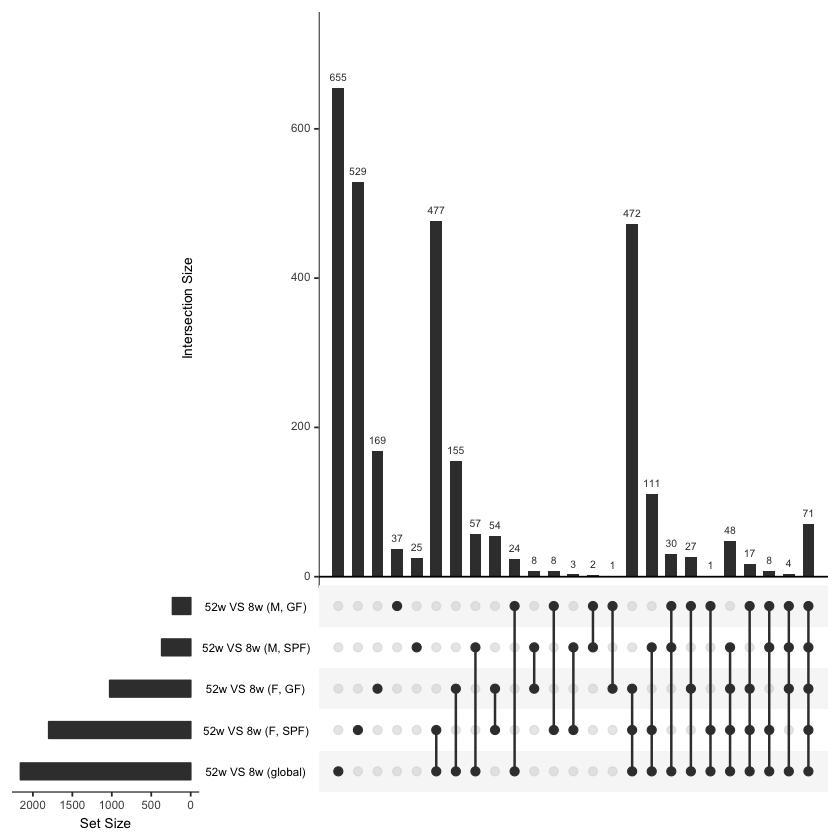

In [85]:
upset(as.data.frame(gender_type_deg_52w_8w$deg))

### 104w vs 8w

In [86]:
gender_type_data_104w_8w = list(F_SPF_104w_8w, F_GF_104w_8w, M_SPF_104w_8w, M_GF_104w_8w, global_104w_8w)
names(gender_type_data_104w_8w) = c("104w VS 8w (F, SPF)", "104w VS 8w (F, GF)", "104w VS 8w (M, SPF)", "104w VS 8w (M, GF)", "104w VS 8w (global)")
gender_type_deg_104w_8w = extract_diff_expr_genes(gender_type_data_104w_8w, "gender_type_data_104w_8w")

Can't find mm10/geneSymbol length data in genLenDataBase...
Warning message in grep(txdbPattern, installedPackages):
“argument 'pattern' has length > 1 and only the first element will be used”Found the annotaion package, TxDb.Mmusculus.UCSC.mm10.knownGene
Trying to get the gene lengths from it.
Warning message in pcls(G):
“initial point very close to some inequality constraints”Can't find mm10/geneSymbol length data in genLenDataBase...
Warning message in grep(txdbPattern, installedPackages):
“argument 'pattern' has length > 1 and only the first element will be used”Found the annotaion package, TxDb.Mmusculus.UCSC.mm10.knownGene
Trying to get the gene lengths from it.
Warning message in pcls(G):
“initial point very close to some inequality constraints”Can't find mm10/geneSymbol length data in genLenDataBase...
Warning message in grep(txdbPattern, installedPackages):
“argument 'pattern' has length > 1 and only the first element will be used”Found the annotaion package, TxDb.Mmusculus.UC

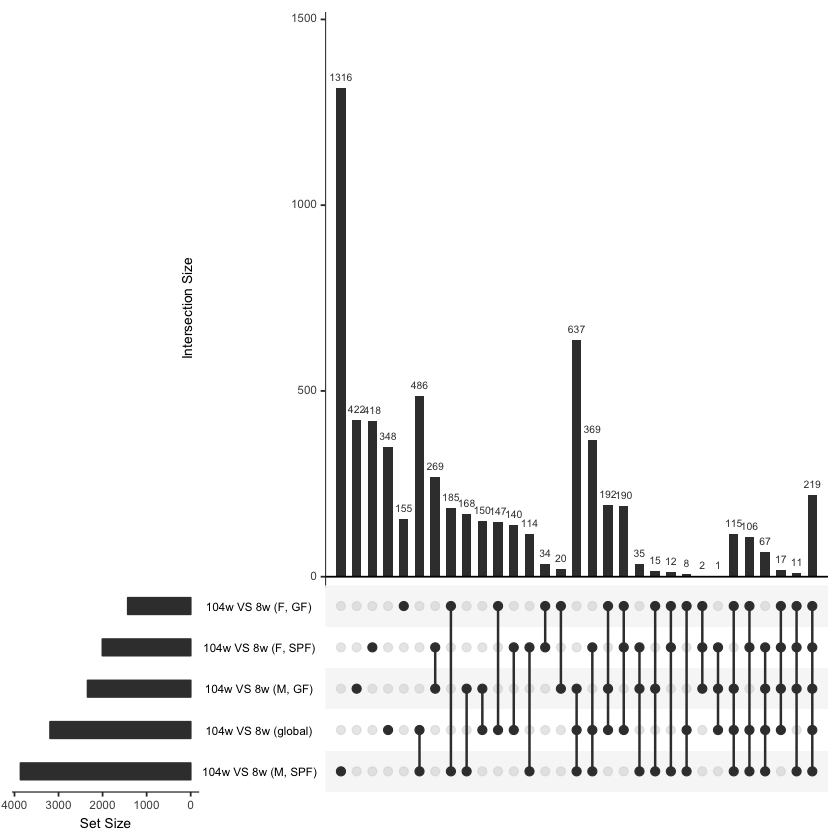

In [87]:
upset(as.data.frame(gender_type_deg_104w_8w$deg))

### 104w vs 52w

In [88]:
gender_type_data_104w_52w = list(F_SPF_104w_52w, F_GF_104w_52w, M_SPF_104w_52w, M_GF_104w_52w, global_104w_52w)
names(gender_type_data_104w_52w) = c("104w VS 52w (F, SPF)", "104w VS 52w (F, GF)", "104w VS 52w (M, SPF)", "104w VS 52w (M, GF)", "104w VS 52w (global)")
gender_type_deg_104w_52w = extract_diff_expr_genes(gender_type_data_104w_52w, "gender_type_data_104w_52w")

Can't find mm10/geneSymbol length data in genLenDataBase...
Warning message in grep(txdbPattern, installedPackages):
“argument 'pattern' has length > 1 and only the first element will be used”Found the annotaion package, TxDb.Mmusculus.UCSC.mm10.knownGene
Trying to get the gene lengths from it.
Warning message in pcls(G):
“initial point very close to some inequality constraints”Can't find mm10/geneSymbol length data in genLenDataBase...
Warning message in grep(txdbPattern, installedPackages):
“argument 'pattern' has length > 1 and only the first element will be used”Found the annotaion package, TxDb.Mmusculus.UCSC.mm10.knownGene
Trying to get the gene lengths from it.
Warning message in pcls(G):
“initial point very close to some inequality constraints”Can't find mm10/geneSymbol length data in genLenDataBase...
Warning message in grep(txdbPattern, installedPackages):
“argument 'pattern' has length > 1 and only the first element will be used”Found the annotaion package, TxDb.Mmusculus.UC

In [ ]:
upset(as.data.frame(gender_type_deg_104w_52w$deg))